## Problem Statement
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

### Potential Business Problems

### Why solve this problem?

## Dataset Description
The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers.

#### Following are the features of the dataset
Target: Claim Status (Claim)
Name of agency (Agency)
Type of travel insurance agencies (Agency.Type)
Distribution channel of travel insurance agencies (Distribution.Channel)
Name of the travel insurance products (Product.Name)
Duration of travel (Duration)
Destination of travel (Destination)
Amount of sales of travel insurance policies (Net.Sales)
The commission received for travel insurance agency (Commission)
Age of insured (Age)
The identification record of every observation (ID)

### Evaluation Metric
The evaluation metric for this task will be  precision_score. Read up about it more here.

### Submission Format
The user has to submit a csv file with the ID and Claim label. Sample submission file has been given to you. You can refer the sample submission file.

In [1]:
# Importing Necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# loading the train and test dataset

train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [6]:
# looking at a first few instances of the data

train['Insurances sold']=1
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Insurances sold
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.00,0.00,41,0,1
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.00,0.00,35,0,1
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.80,11.88,47,0,1
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.00,0.00,48,0,1
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.00,0.00,36,0,1


In [7]:
agencyclaimed=train.groupby(['Agency Type','Claim']).size().unstack(fill_value=0)
agencyclaimed

Claim,0,1
Agency Type,,
Airlines,11792,5522
Travel Agency,31798,3198


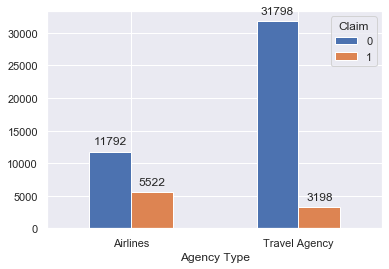

In [8]:
agencyclaimed=train.groupby(['Agency Type','Claim']).size().unstack(fill_value=0)
ax = agencyclaimed.plot(kind='bar') 
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xticks(rotation=None)
plt.show()

#### Starting off with simple observations
- There are 43,590 observations (83.33%) for 'Not Claimed' insurances and only 8,720 (16.66%) 'Claimed' insurances. The data set is quite imbalanced. 
- Most insurances are issued by Travel Agencies(66.90%) and the rest by Airlines. 
- Critical: 31.89% of insurances issued by Airlines are claimed whereas only 9.14% of insurances issued by Travel Agencies are claimed. 

- Insight: Claimed Insurances for Airlines is very high. The company should change the threshold of insurances sold by Airlines. 

### Working on ID Column

In [9]:
pivot = train.pivot_table(index=['ID','Agency'], values=['Insurances sold','Claim'], aggfunc='sum')
pivot

Claim  Insurances sold
ID    Agency                        
2000  C2B         1                1
      CWT         0                1
      EPX         0                4
2001  C2B         0                1
      EPX         0                3
...             ...              ...
9999  EPX         0                5
10000 C2B         3                3
      CWT         0                1
      EPX         0                4
      JZI         0                1

[25505 rows x 2 columns]

In [10]:
pivot = train.pivot_table(index=['ID'], values=['Insurances sold','Claim','Net Sales'], aggfunc='sum')
pivot. sort_values(by='Net Sales', ascending= False)

,Claim,Insurances sold,Net Sales
ID,,,
6031,1,13,1223.70
4299,5,9,1219.99
2200,5,11,1210.89
4972,2,11,1207.80
2566,0,15,1183.85
...,...,...,...
6130,2,7,-90.09
9330,0,1,-112.00
4546,0,3,-120.00


#### Insights for the 'ID' column
- From the plot above, these are top 5 customers who issued travel insurance from Safe Travel Inc multiple times and generated maximum sales for the company. 
- Also, bottom 5 customers on whom the company is losing money.
- Insight: Vouchers can be given to customers who give maximum sales to the company and not randomly. 

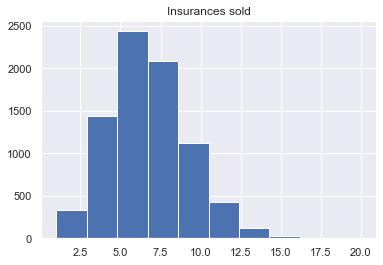

In [11]:
pivot['Insurances sold'].hist()
plt.title('Insurances sold')
plt.show()

In [12]:
pivot.describe()

,Claim,Insurances sold,Net Sales
count,7992.00,7992.00,7992.00
mean,1.09,6.55,317.80
std,1.05,2.57,197.79
min,0.00,1.00,-140.75
25%,0.00,5.00,168.00
50%,1.00,6.00,280.91
75%,2.00,8.00,427.68
max,7.00,20.00,1223.70


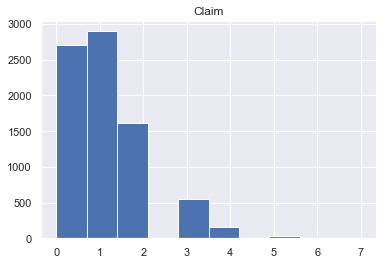

In [13]:
pivot['Claim'].hist()
plt.title('Claim')
plt.show()

In [14]:
pivot[pivot['Claim']==7]

,Claim,Insurances sold,Net Sales
ID,,,
5696,7,20,1143.86
8424,7,12,758.81


#### Observations for ID Column
- There are only 7992 unique customers who have bought multiple insurances. 
- More than 50% customers in the data set have bought insurances between 5 to 8 times. Most customers have returned to buy travel insurances. 
- 66.14%(5286) of customers have claimed their insurances at least once. 2706 customers (33.85%) were never approved a claim. 
- 2 Customers (ID- 5696 &  8424) have claimed their insurance 7 times. 
- Insight: 83% of insurances issued are not claimed yet almost 66% customers get their claim money. Simply from the data, most customers find it suitable to issue an insurance and hence come back several times but we don't know if the company is able to keep its profit margins. 

In [15]:
print(train['ID'].nunique())
train.sort_values(['ID'])

7992


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Insurances sold
26160,2000,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,128.00,0.00,36,0,1
40375,2000,EPX,Travel Agency,Online,2 way Comprehensive Plan,9,MALAYSIA,51.00,0.00,31,0,1
18301,2000,EPX,Travel Agency,Online,2 way Comprehensive Plan,40,AUSTRALIA,73.00,0.00,36,0,1
44554,2000,C2B,Airlines,Online,Silver Plan,11,SINGAPORE,39.22,9.81,24,1,1
35748,2000,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,55,MALAYSIA,39.60,23.76,46,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,10000,EPX,Travel Agency,Online,Cancellation Plan,63,MYANMAR,14.00,0.00,36,0,1
10355,10000,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,42,AUSTRALIA,39.60,23.76,37,0,1
3852,10000,C2B,Airlines,Online,Bronze Plan,24,SINGAPORE,27.43,6.86,56,1,1
23810,10000,JZI,Airlines,Online,Basic Plan,42,INDONESIA,18.00,6.30,34,0,1


In [16]:
print(train['ID'].value_counts())
train[train['ID']== 5696]

5696    20
2002    17
4515    17
9165    16
4080    16
        ..
6768     1
6748     1
2141     1
4172     1
3651     1
Name: ID, Length: 7992, dtype: int64


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Insurances sold
4861,5696,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,HONG KONG,93.00,0.00,36,0,1
9091,5696,EPX,Travel Agency,Online,2 way Comprehensive Plan,21,THAILAND,22.00,0.00,36,0,1
10158,5696,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,134,UNITED KINGDOM,108.90,65.34,46,0,1
14407,5696,JZI,Airlines,Online,Basic Plan,6,VIET NAM,22.00,7.70,32,0,1
22008,5696,EPX,Travel Agency,Online,1 way Comprehensive Plan,5,SINGAPORE,21.00,0.00,36,0,1
22476,5696,TTW,Travel Agency,Offline,Individual Comprehensive Plan,365,SINGAPORE,139.72,26.86,39,1,1
28081,5696,EPX,Travel Agency,Online,Cancellation Plan,10,INDIA,23.00,0.00,36,0,1
30985,5696,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,27.00,6.75,26,1,1
33843,5696,C2B,Airlines,Online,Silver Plan,40,SINGAPORE,102.81,25.71,25,1,1
40470,5696,JZI,Airlines,Online,Basic Plan,16,PHILIPPINES,37.00,12.95,27,0,1


#### Insights for the 'ID' column
- Only 7992 unique customers in the data set of 52310 travel insurances. There are many repeat customers who have applied from different travel agencies or airlines. 
- Maximum times a customer (ID- 5696) has issued a travel insurance is 20 times. 

#### Moving on to Different Visualizations- 
1. Distribution of Destination of customers through a heat map of the world. 
2. Agency Type-Claim Histogram
3. Agency Type- Agency- Claim Histogram
4. Product Name-Claim
5. Agency- Product Name- Claim
6. Duration-Claim & Age-Claim
7. Net Sales and commission of Agencies using Pivot
8. Net Sales and commission from Products 
9. We can also check if net sales per product or agency has relation with Claim.

### Columns- Agency, Agency Type, Product Name, Net Sales

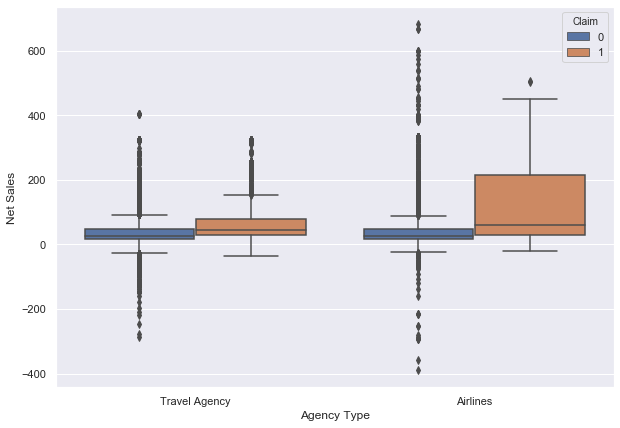

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Agency Type", y="Net Sales", hue="Claim", data=train)

In [18]:
train_notclaimed= train[train['Claim']==0]
train_notclaimed.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold
count,43590.00,43590.00,43590.00,43590.00,43590.00,43590.00,43590.00
mean,5999.15,48.42,39.76,9.58,39.93,0.00,1.00
std,2307.66,99.03,47.34,19.41,13.98,0.00,0.00
min,2000.00,-2.00,-389.00,0.00,0.00,0.00,1.00
25%,3995.00,9.00,18.00,0.00,35.00,0.00,1.00
50%,5997.00,22.00,26.00,0.00,36.00,0.00,1.00
75%,7996.00,52.00,47.00,10.64,43.00,0.00,1.00
max,10000.00,4881.00,682.00,262.76,118.00,0.00,1.00


In [19]:
train_claimed= train[train['Claim']==1]
train_claimed.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold
count,8720.00,8720.00,8720.00,8720.00,8720.00,8720.00,8720.00
mean,6038.71,107.44,92.54,25.43,37.70,1.00,1.00
std,2300.26,139.75,90.64,32.22,12.46,0.00,0.00
min,2000.00,1.00,-37.00,0.00,14.00,1.00,1.00
25%,4094.50,15.00,29.14,4.33,30.00,1.00,1.00
50%,6020.00,35.00,52.61,12.31,36.00,1.00,1.00
75%,8037.00,112.00,112.00,43.31,42.00,1.00,1.00
max,10000.00,431.00,507.00,210.21,118.00,1.00,1.00


In [20]:
sales50above= train[train['Net Sales']>=50]
sales50above['Claim'].value_counts()

0    9872
1    4486
Name: Claim, dtype: int64

In [21]:
sales50below= train[train['Net Sales']<50]
sales50below['Claim'].value_counts()

0    33718
1     4234
Name: Claim, dtype: int64

#### Observations from Agency and Net Sales Column
- From the data, 4,486 insurances (31.24%) are claimed out of 14,358 insurances with Net Sales above 50. 
- Whereas, only 4,234 insurances (11.15%) are claimed out of 37,952 insurances with Net Sales below 50. 
- Insurances with higher 'Net Sales' are claimed more often than with lower Net Sales. 

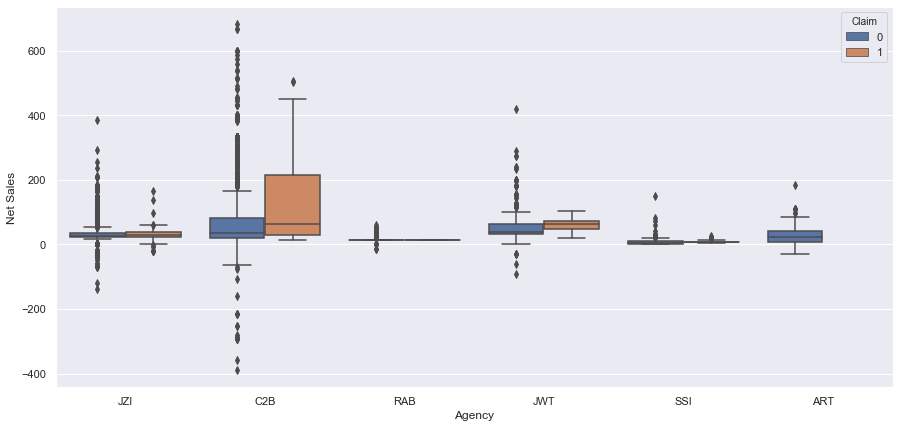

In [22]:
Airlines_only= train[train['Agency Type']=='Airlines']
Airlines_only
plt.figure(figsize=(15,7))
sns.boxplot(x="Agency", y="Net Sales", hue="Claim", data=Airlines_only)

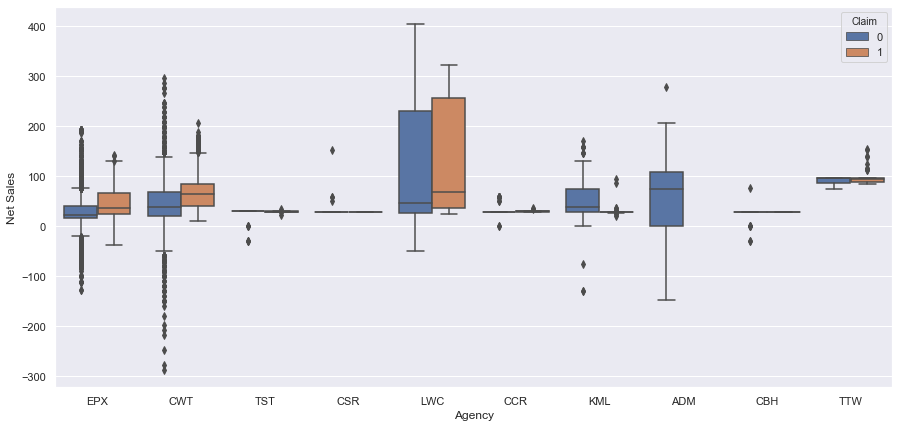

In [23]:
Agency_only= train[train['Agency Type']=='Travel Agency']
Agency_only
plt.figure(figsize=(15,7))
sns.boxplot(x="Agency", y="Net Sales", hue="Claim", data=Agency_only)

- The observation also fits well with how agencies sell insurances. Agencies such as C2B, LWC, EPX and CWT have more claimed insurances because they sell insurances for more Net sales. 

- Insight: If Safe Travel Inc. wants less claimed insurances, they can ask the agencies to focus on insurances that generate less Net sales.  

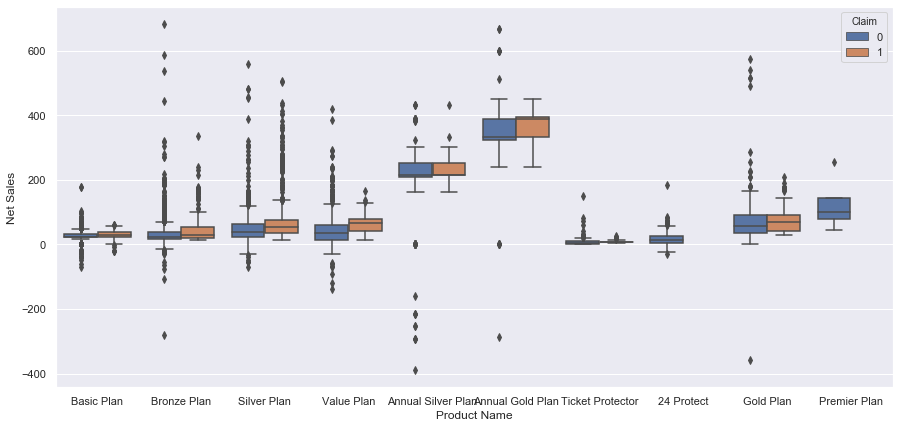

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Product Name", y="Net Sales", hue="Claim", data=Airlines_only)

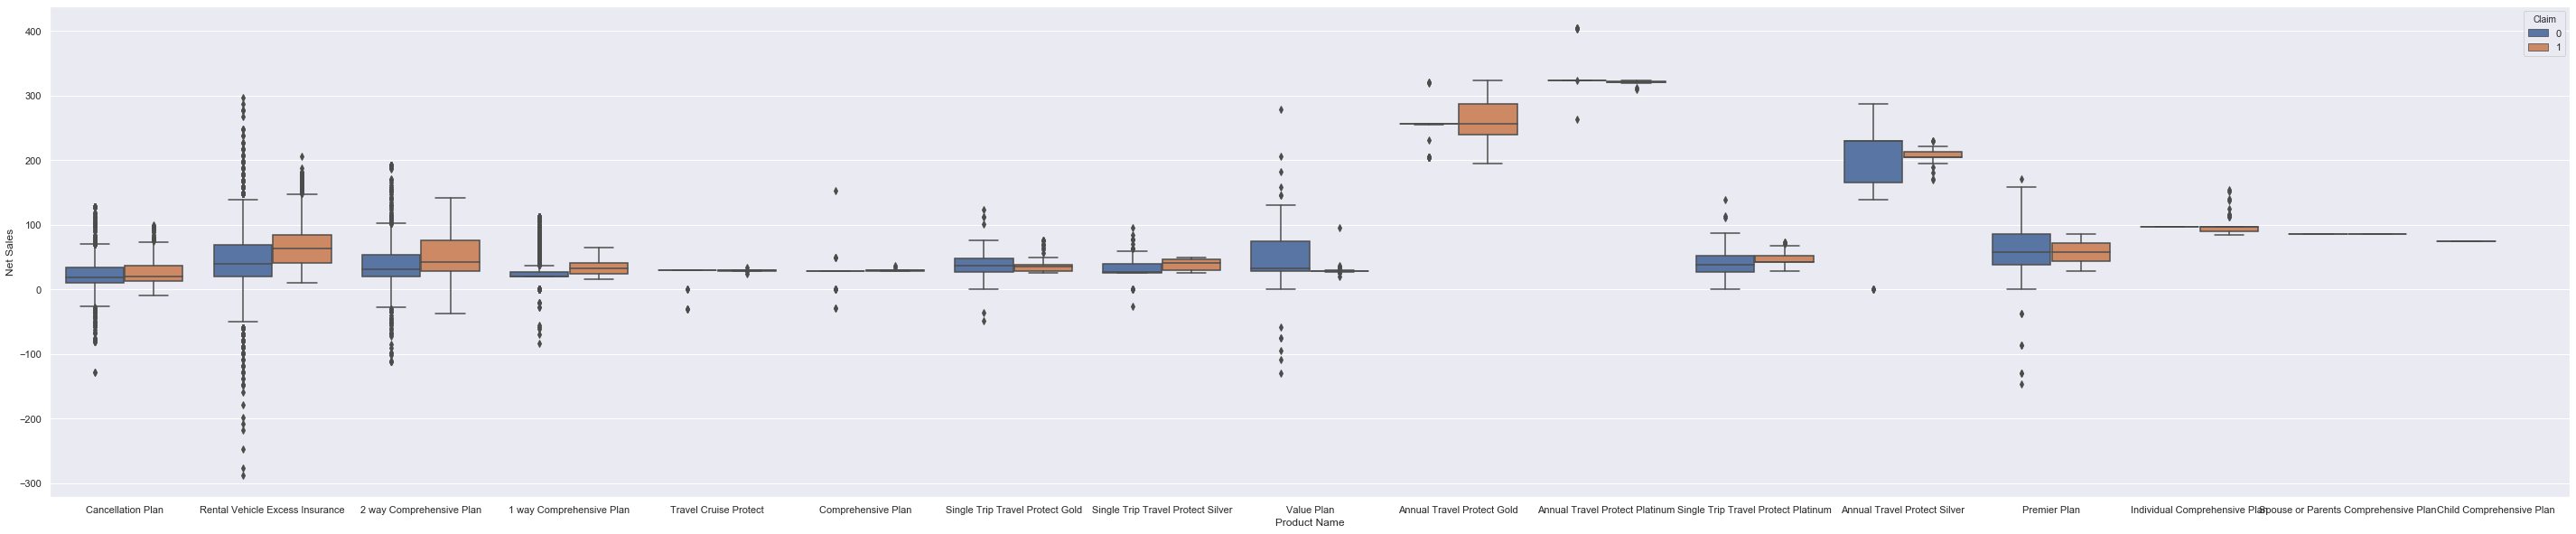

In [25]:
plt.figure(figsize=(50,10))
sns.boxplot(x="Product Name", y="Net Sales", hue="Claim", data=Agency_only)

### Columns- Agency, Agency Type, Product Name, Commission

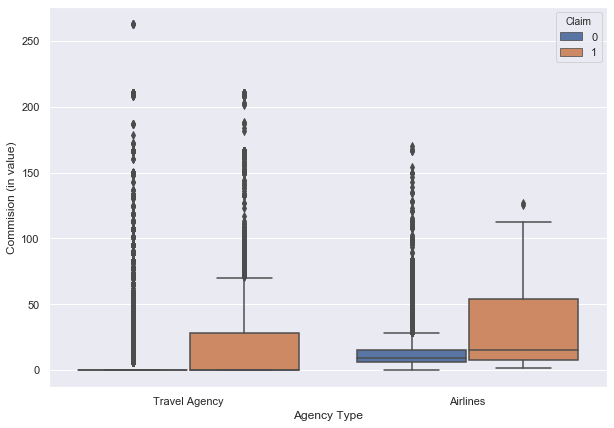

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Agency Type", y="Commision (in value)", hue="Claim", data=train)

In [27]:
train_notclaimed= train[train['Claim']==0]
train_notclaimed.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold
count,43590.00,43590.00,43590.00,43590.00,43590.00,43590.00,43590.00
mean,5999.15,48.42,39.76,9.58,39.93,0.00,1.00
std,2307.66,99.03,47.34,19.41,13.98,0.00,0.00
min,2000.00,-2.00,-389.00,0.00,0.00,0.00,1.00
25%,3995.00,9.00,18.00,0.00,35.00,0.00,1.00
50%,5997.00,22.00,26.00,0.00,36.00,0.00,1.00
75%,7996.00,52.00,47.00,10.64,43.00,0.00,1.00
max,10000.00,4881.00,682.00,262.76,118.00,0.00,1.00


In [28]:
print(train[train['Commision (in value)']==0].shape)
train_notclaimed[train_notclaimed['Commision (in value)']==0].shape

(26260, 12)


(24404, 12)

In [29]:
train_claimed= train[train['Claim']==1]
train_claimed.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold
count,8720.00,8720.00,8720.00,8720.00,8720.00,8720.00,8720.00
mean,6038.71,107.44,92.54,25.43,37.70,1.00,1.00
std,2300.26,139.75,90.64,32.22,12.46,0.00,0.00
min,2000.00,1.00,-37.00,0.00,14.00,1.00,1.00
25%,4094.50,15.00,29.14,4.33,30.00,1.00,1.00
50%,6020.00,35.00,52.61,12.31,36.00,1.00,1.00
75%,8037.00,112.00,112.00,43.31,42.00,1.00,1.00
max,10000.00,431.00,507.00,210.21,118.00,1.00,1.00


In [30]:
print(train[train['Commision (in value)']>0].shape)
print(train_claimed[train_claimed['Commision (in value)']==0].shape)
print(train_claimed[train_claimed['Commision (in value)']>0].shape)
train_claimed[train_claimed['Commision (in value)']>0].describe()

(26050, 12)
(1856, 12)
(6864, 12)


,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold
count,6864.00,6864.00,6864.00,6864.00,6864.00,6864.00,6864.00
mean,6045.74,120.91,104.19,32.31,37.84,1.00,1.00
std,2301.88,151.35,97.61,33.12,12.80,0.00,0.00
min,2000.00,1.00,-22.00,0.00,14.00,1.00,1.00
25%,4105.75,14.00,29.95,8.50,29.00,1.00,1.00
50%,6009.50,34.00,59.40,18.01,34.00,1.00,1.00
75%,8049.00,364.00,187.85,54.00,44.00,1.00,1.00
max,10000.00,431.00,507.00,210.21,118.00,1.00,1.00


- For No commission, 
- Out of 43,590 insurances that are not claimed, 24,404 insurances (56%) have no commission. For the other 46%, commission value is very scattered from 0 to 262.76
- Out of 26,260 insurances with no commission, only 1856 insurances (7%) are claimed. 
- For commission more than 0, 
- For the other 6864 claimed (78.71%) insurances, most commission values lies between 8 and 53 with a mean of 32.31. 

- Insight- Do agencies get commission value when an insurance is claimed? 

In [31]:
# 3. Agency Type- Agency- Claim  & 7. Net Sales and commission of Agencies using Pivot
pivot = train.pivot_table(index=['Agency Type','Agency'], values=['Insurances sold','Claim','Net Sales','Commision (in value)'], columns=[], aggfunc='sum').fillna('')
pivot

Claim  Commision (in value)  Insurances sold  Net Sales
Agency Type   Agency                                                         
Airlines      ART         0               2264.39              223    6234.16
              C2B      5177             255606.81            10615 1000629.31
              JWT        31              12073.00              550   29666.76
              JZI       256              53462.49             4619  146920.41
              RAB         1               3785.20              527    9313.00
              SSI        57               1438.94              780    5134.45
Travel Agency ADM         0               2209.70               56    3020.00
              CBH         1                764.28               76    2019.00
              CCR        10               1637.85              156    4843.96
              CSR         1                641.19               60    1943.00
              CWT       848             227852.79             6813  314100.06
              EPX      1880                419.74            26218  877945.27
              KML        47               6335.10              313   15973.42
              LWC       352              66409.36              806  100694.57
              TST        21               4138.05              394   11532.73
              TTW        38                187.38              104    9924.84

In [32]:
# Plot a grouped bar chart of Agency Vs (Insurances sold & Claims) Per Agency Type

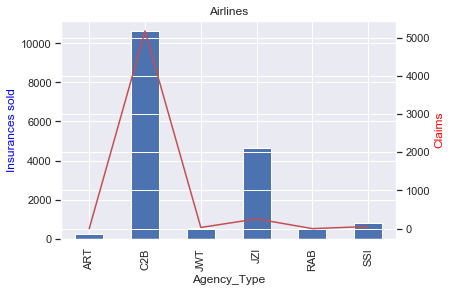

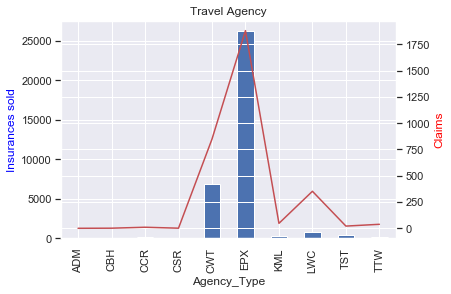

In [33]:
# Plotting Insurances sold and Claims by every Agency
Agencies=pivot.index.get_level_values(0).unique()
for Agency in Agencies:
    split=pivot.xs(Agency)
    Ins_sold=split["Insurances sold"]
    Claim=split["Claim"]
    
    fig = plt.figure()
    ax1 = Ins_sold.plot(kind="bar")
    ax2 = ax1.twinx()
    ax2.plot(ax1.get_xticks(),Claim,color="r")
    #ax2.set_ylim((-5, 50.))
    #ax1.set_ylim((0, 300.))
    ax1.set_ylabel('Insurances sold', color='blue')
    ax2.set_ylabel('Claims', color='red')
    ax1.set_xlabel('Agency_Type')
    plt.title(Agency)

In [34]:
# Find Percentage of claims from all insurances sold by every Agency
# And Percentage of commission earned by every agency compared to the sales generated. 
pivot['Perc_claim']= pivot['Claim']*100/pivot['Insurances sold']
pivot['Perc_Commission_seperate']= pivot['Commision (in value)']*100/(pivot['Commision (in value)']+pivot['Net Sales'])
pivot['Perc_Commission_included']= pivot['Commision (in value)']*100/pivot['Net Sales']
pivot

Claim  Commision (in value)  Insurances sold  Net Sales  \
Agency Type   Agency                                                            
Airlines      ART         0               2264.39              223    6234.16   
              C2B      5177             255606.81            10615 1000629.31   
              JWT        31              12073.00              550   29666.76   
              JZI       256              53462.49             4619  146920.41   
              RAB         1               3785.20              527    9313.00   
              SSI        57               1438.94              780    5134.45   
Travel Agency ADM         0               2209.70               56    3020.00   
              CBH         1                764.28               76    2019.00   
              CCR        10               1637.85              156    4843.96   
              CSR         1                641.19               60    1943.00   
              CWT       848             227852.79             6813  314100.06   
              EPX      1880                419.74            26218  877945.27   
              KML        47               6335.10              313   15973.42   
              LWC       352              66409.36              806  100694.57   
              TST        21               4138.05              394   11532.73   
              TTW        38                187.38              104    9924.84   

                      Perc_claim  Perc_Commission_seperate  \
Agency Type   Agency                                         
Airlines      ART           0.00                     26.64   
              C2B          48.77                     20.35   
              JWT           5.64                     28.92   
              JZI           5.54                     26.68   
              RAB           0.19                     28.90   
              SSI           7.31                     21.89   
Travel Agency ADM           0.00                     42.25   
              CBH           1.32                     27.46   
              CCR           6.41                     25.27   
              CSR           1.67                     24.81   
              CWT          12.45                     42.04   
              EPX           7.17                      0.05   
              KML          15.02                     28.40   
              LWC          43.67                     39.74   
              TST           5.33                     26.41   
              TTW          36.54                      1.85   

                      Perc_Commission_included  
Agency Type   Agency                            
Airlines      ART                        36.32  
              C2B                        25.54  
              JWT                        40.70  
              JZI                        36.39  
              RAB                        40.64  
              SSI                        28.03  
Travel Agency ADM                        73.17  
              CBH                        37.85  
              CCR                        33.81  
              CSR                        33.00  
              CWT                        72.54  
              EPX                         0.05  
              KML                        39.66  
              LWC                        65.95  
              TST                        35.88  
              TTW                         1.89

#### Observations for Agencies:
- 34996 data points for Travel Agency (66.90%) & 17314 data points for Airlines (33.09%).
- There are 6 Airlines (ART, C2B, JWT, JZI, RAB, SSI) and, 
- 10 Travel Agencies (ADM, CBH, CCR, CSR, CWT, EPX, KML, LWC, TST, TTW) who sell Sale Travel Inc. insurances. 

#### Percentage of Claims Per Agency
- In Airlines, 49% of insurances sold by C2B are claimed whereas from other airlines, less than 10% of insurances are claimed. 
- Similarly in Travel Agency, 44% of insurances from LWC and 37% of insurances from TTW sold are claimed, for rest less than 15% are claimed.  
-- Insight: Although these agency sell a lot of insurances and generates highest sales from insurances for the company, the company must be losing a lot of money on claims. The company needs to have stricter rules to check the insurances being claimed. Their can be higher chances of false claims from these agencies. 

In [35]:
# Find Percentage on train data. for every observation
# And Percentage of commission earned compared to the sales generated. 
train['Perc_Commission_seperate']= train['Commision (in value)']*100/(train['Commision (in value)']+train['Net Sales'])
train['Perc_Commission_included']= train['Commision (in value)']*100/train['Net Sales']
train

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Insurances sold,Perc_Commission_seperate,Perc_Commission_included
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.00,0.00,41,0,1,0.00,0.00
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.00,0.00,35,0,1,0.00,0.00
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.80,11.88,47,0,1,37.50,60.00
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.00,0.00,48,0,1,0.00,0.00
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.00,0.00,36,0,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.75,111.19,40,1,1,20.00,25.00
52306,5282,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.00,9.20,54,0,1,28.57,40.00
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.10,15.28,37,0,1,20.01,25.01
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.00,0.00,46,0,1,0.00,0.00


[(-200, 200)]

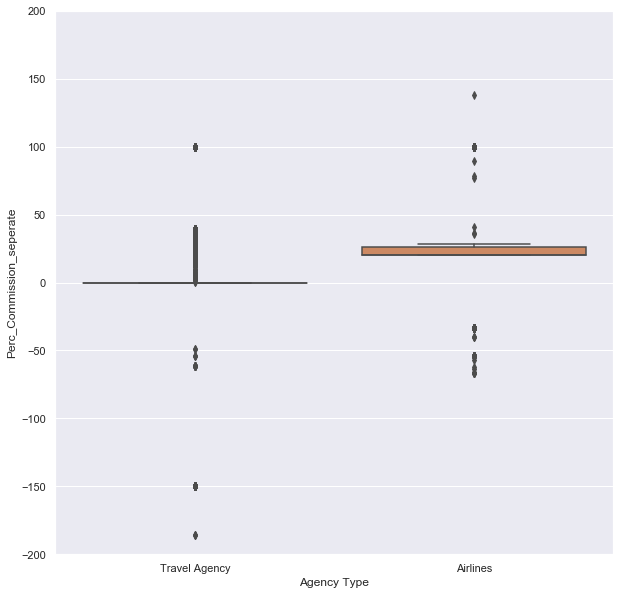

In [36]:
plt.figure(figsize=(10,10))
ax= sns.boxplot(x="Agency Type", y="Perc_Commission_seperate", data=train)
ax.set(ylim=(-200, 200))

In [37]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold,Perc_Commission_seperate,Perc_Commission_included
count,52310.00,52310.00,52310.00,52310.00,52310.00,52310.00,52310.00,51921.00,51921.00
mean,6005.75,58.26,48.55,12.22,39.56,0.17,1.00,13.55,inf
std,2306.45,109.14,60.20,22.85,13.76,0.37,0.00,31.50,nan
min,2000.00,-2.00,-389.00,0.00,0.00,0.00,1.00,-5157.46,-364.55
25%,4015.00,10.00,19.80,0.00,33.00,0.00,1.00,0.00,0.00
50%,6002.00,24.00,29.50,0.00,36.00,0.00,1.00,0.00,0.00
75%,8004.00,57.00,55.00,13.38,43.00,0.00,1.00,25.93,35.00
max,10000.00,4881.00,682.00,262.76,118.00,1.00,1.00,137.80,inf


### Moving on to Analysis of Products

In [38]:
# 8. Net Sales and commission from Products 
pivot = train.pivot_table(index=['Agency Type','Product Name'], values=['Insurances sold','Claim','Net Sales','Commision (in value)'], aggfunc='sum')
pivot

Claim  \
Agency Type   Product Name                                  
Airlines      24 Protect                                0   
              Annual Gold Plan                        172   
              Annual Silver Plan                     1451   
              Basic Plan                              246   
              Bronze Plan                            2020   
              Gold Plan                               143   
              Premier Plan                              0   
              Silver Plan                            1384   
              Ticket Protector                         57   
              Value Plan                               49   
Travel Agency 1 way Comprehensive Plan                 68   
              2 way Comprehensive Plan               1457   
              Annual Travel Protect Gold              120   
              Annual Travel Protect Platinum           14   
              Annual Travel Protect Silver             31   
              Cancellation Plan                       355   
              Child Comprehensive Plan                  0   
              Comprehensive Plan                       12   
              Individual Comprehensive Plan            37   
              Premier Plan                              2   
              Rental Vehicle Excess Insurance         848   
              Single Trip Travel Protect Gold         121   
              Single Trip Travel Protect Platinum      50   
              Single Trip Travel Protect Silver        16   
              Spouse or Parents Comprehensive Plan      1   
              Travel Cruise Protect                    21   
              Value Plan                               45   

                                                    Commision (in value)  \
Agency Type   Product Name                                                 
Airlines      24 Protect                                         1258.49   
              Annual Gold Plan                                  26990.03   
              Annual Silver Plan                               134520.98   
              Basic Plan                                        38768.28   
              Bronze Plan                                       42748.01   
              Gold Plan                                          7680.68   
              Premier Plan                                        174.65   
              Silver Plan                                       43360.45   
              Ticket Protector                                   1438.94   
              Value Plan                                        31690.31   
Travel Agency 1 way Comprehensive Plan                             43.49   
              2 way Comprehensive Plan                            278.22   
              Annual Travel Protect Gold                        30773.76   
              Annual Travel Protect Platinum                    10753.22   
              Annual Travel Protect Silver                      12298.34   
              Cancellation Plan                                    98.03   
              Child Comprehensive Plan                              0.00   
              Comprehensive Plan                                 2769.42   
              Individual Comprehensive Plan                       187.38   
              Premier Plan                                       3956.86   
              Rental Vehicle Excess Insurance                  227852.79   
              Single Trip Travel Protect Gold                    6467.60   
              Single Trip Travel Protect Platinum                3091.06   
              Single Trip Travel Protect Silver                  3025.38   
              Spouse or Parents Comprehensive Plan                  0.00   
              Travel Cruise Protect                              4138.05   
              Value Plan                                         4861.84   

                                                    Insurances sold  Net Sale

In [39]:
# Find Percentage of claims from all insurances sold by every Agency
# And Percentage of commission earned by every agency compared to the sales generated. 
pivot['Perc_claim']= pivot['Claim']*100/pivot['Insurances sold']
pivot['Perc_Commission_seperate']= pivot['Commision (in value)']*100/(pivot['Commision (in value)']+pivot['Net Sales'])
pivot['Perc_Commission_included']= pivot['Commision (in value)']*100/pivot['Net Sales']
pivot

Claim  \
Agency Type   Product Name                                  
Airlines      24 Protect                                0   
              Annual Gold Plan                        172   
              Annual Silver Plan                     1451   
              Basic Plan                              246   
              Bronze Plan                            2020   
              Gold Plan                               143   
              Premier Plan                              0   
              Silver Plan                            1384   
              Ticket Protector                         57   
              Value Plan                               49   
Travel Agency 1 way Comprehensive Plan                 68   
              2 way Comprehensive Plan               1457   
              Annual Travel Protect Gold              120   
              Annual Travel Protect Platinum           14   
              Annual Travel Protect Silver             31   
              Cancellation Plan                       355   
              Child Comprehensive Plan                  0   
              Comprehensive Plan                       12   
              Individual Comprehensive Plan            37   
              Premier Plan                              2   
              Rental Vehicle Excess Insurance         848   
              Single Trip Travel Protect Gold         121   
              Single Trip Travel Protect Platinum      50   
              Single Trip Travel Protect Silver        16   
              Spouse or Parents Comprehensive Plan      1   
              Travel Cruise Protect                    21   
              Value Plan                               45   

                                                    Commision (in value)  \
Agency Type   Product Name                                                 
Airlines      24 Protect                                         1258.49   
              Annual Gold Plan                                  26990.03   
              Annual Silver Plan                               134520.98   
              Basic Plan                                        38768.28   
              Bronze Plan                                       42748.01   
              Gold Plan                                          7680.68   
              Premier Plan                                        174.65   
              Silver Plan                                       43360.45   
              Ticket Protector                                   1438.94   
              Value Plan                                        31690.31   
Travel Agency 1 way Comprehensive Plan                             43.49   
              2 way Comprehensive Plan                            278.22   
              Annual Travel Protect Gold                        30773.76   
              Annual Travel Protect Platinum                    10753.22   
              Annual Travel Protect Silver                      12298.34   
              Cancellation Plan                                    98.03   
              Child Comprehensive Plan                              0.00   
              Comprehensive Plan                                 2769.42   
              Individual Comprehensive Plan                       187.38   
              Premier Plan                                       3956.86   
              Rental Vehicle Excess Insurance                  227852.79   
              Single Trip Travel Protect Gold                    6467.60   
              Single Trip Travel Protect Platinum                3091.06   
              Single Trip Travel Protect Silver                  3025.38   
              Spouse or Parents Comprehensive Plan                  0.00   
              Travel Cruise Protect                              4138.05   
              Value Plan                                         4861.84   

                                                    Insurances sold  \
Agency

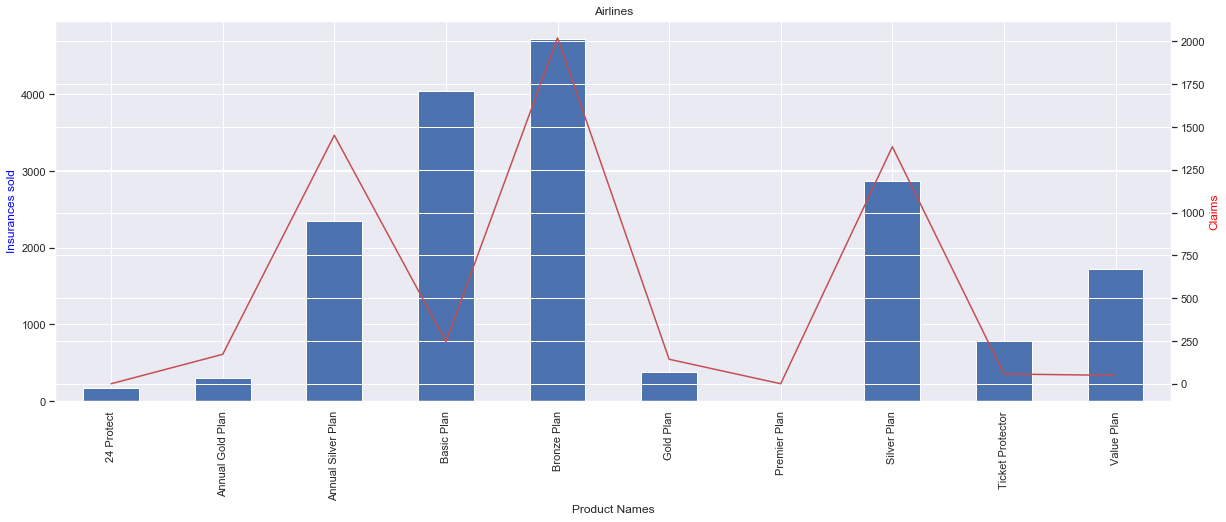

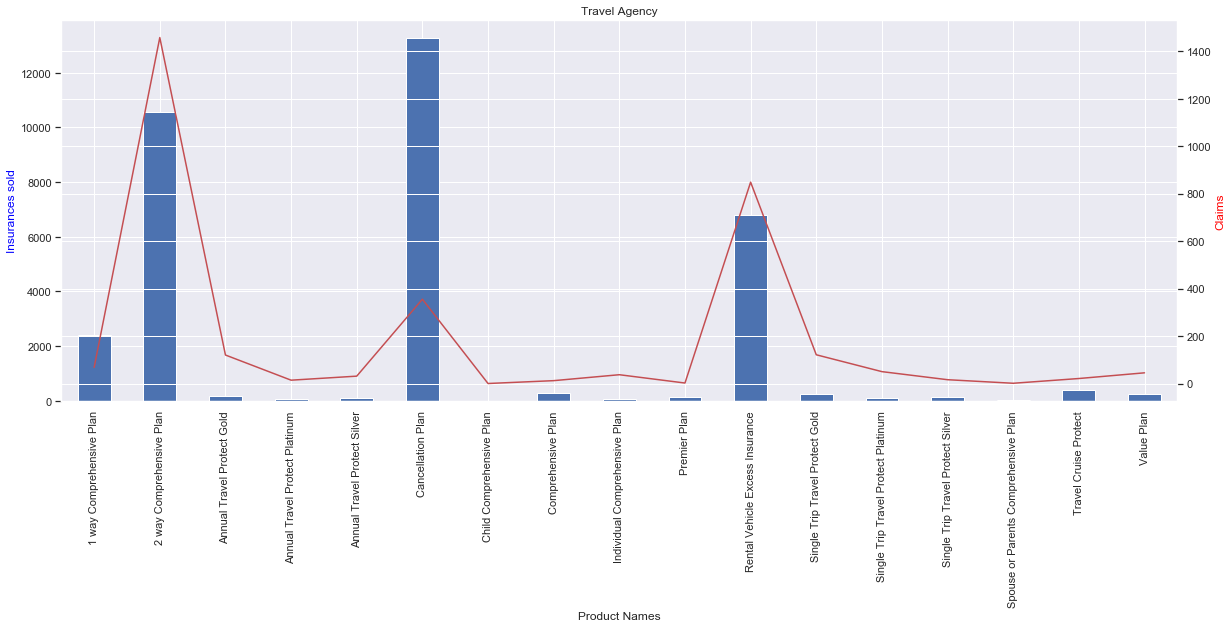

In [40]:
# Plotting Insurances sold and Claims by every Agency
Agencies=pivot.index.get_level_values(0).unique()
for Agency in Agencies:
    split=pivot.xs(Agency)
    Ins_sold=split["Insurances sold"]
    Claim=split["Claim"]
    
    fig = plt.figure(figsize=(20,7))
    ax1 = Ins_sold.plot(kind="bar")
    ax2 = ax1.twinx()
    ax2.plot(ax1.get_xticks(),Claim,color="r")
    #ax2.set_ylim((-5, 50.))
    #ax1.set_ylim((0, 300.))
    ax1.set_ylabel('Insurances sold', color='blue')
    ax2.set_ylabel('Claims', color='red')
    ax1.set_xlabel('Product Names')
    plt.title(Agency)

In [41]:
# 4. Product Name-Claim & 5. Agency- Product Name- Claim
pivot = train.pivot_table(index=['Agency','Product Name'], values=['Insurances sold','Claim','Net Sales','Commision (in value)'], aggfunc='sum')
pivot

Claim  Commision (in value)  \
Agency Product Name                                                        
ADM    Premier Plan                              0               1104.66   
       Value Plan                                0               1105.04   
ART    24 Protect                                0               1258.49   
       Value Plan                                0               1005.90   
C2B    Annual Gold Plan                        172              26990.03   
       Annual Silver Plan                     1451             134520.98   
       Bronze Plan                            2020              42748.01   
       Gold Plan                               143               7680.68   
       Silver Plan                            1384              43360.45   
       Value Plan                                7                306.66   
CBH    Comprehensive Plan                        1                739.20   
       Premier Plan                              0                 25.08   
CCR    Comprehensive Plan                       10               1427.31   
       Premier Plan                              0                210.54   
CSR    Comprehensive Plan                        1                602.91   
       Premier Plan                              0                 38.28   
CWT    Rental Vehicle Excess Insurance         848             227852.79   
EPX    1 way Comprehensive Plan                 68                 43.49   
       2 way Comprehensive Plan               1457                278.22   
       Cancellation Plan                       355                 98.03   
JWT    Value Plan                               31              12073.00   
JZI    Basic Plan                              246              38768.28   
       Premier Plan                              0                174.65   
       Value Plan                               10              14519.56   
KML    Premier Plan                              2               2578.30   
       Value Plan                               45               3756.80   
LWC    Annual Travel Protect Gold              120              30773.76   
       Annual Travel Protect Platinum           14              10753.22   
       Annual Travel Protect Silver             31              12298.34   
       Single Trip Travel Protect Gold         121               6467.60   
       Single Trip Travel Protect Platinum      50               3091.06   
       Single Trip Travel Protect Silver        16               3025.38   
RAB    Value Plan                                1               3785.20   
SSI    Ticket Protector                         57               1438.94   
TST    Travel Cruise Protect                    21               4138.05   
TTW    Child Comprehensive Plan                  0                  0.00   
       Individual Comprehensive Plan            37                187.38   
       Spouse or Parents Comprehensive Plan      1                  0.00   

                                             Insurances sold  Net Sales  
Agency Product Name                                                      
ADM    Premier Plan                                       30    1337.00  
       Value Plan                                         26    1683.00  
ART    24 Protect                                        165    3389.16  
       Value Plan                                         58    2845.00  
C2B    Annual Gold Plan                                  295  105211.77  
       Annual Silver Plan                               2348  529705.61  
       Bronze Plan                                      4723  166163.65  
       Gold Plan                                         380   28692.24  
       Silver Plan                                      2862  170003.08  
       Value Plan                                          7     852.95  
CBH    Comprehensive Plan                                 75    1943.00  
       Premier Plan                       

In [42]:
# Find Percentage of claims from all insurances sold by every Agency
# And Percentage of commission earned by every agency compared to the sales generated. 
pivot['Perc_claim']= pivot['Claim']*100/pivot['Insurances sold']
pivot['Perc_Commission_seperate']= pivot['Commision (in value)']*100/(pivot['Commision (in value)']+pivot['Net Sales'])
pivot['Perc_Commission_included']= pivot['Commision (in value)']*100/pivot['Net Sales']
pivot

Claim  Commision (in value)  \
Agency Product Name                                                        
ADM    Premier Plan                              0               1104.66   
       Value Plan                                0               1105.04   
ART    24 Protect                                0               1258.49   
       Value Plan                                0               1005.90   
C2B    Annual Gold Plan                        172              26990.03   
       Annual Silver Plan                     1451             134520.98   
       Bronze Plan                            2020              42748.01   
       Gold Plan                               143               7680.68   
       Silver Plan                            1384              43360.45   
       Value Plan                                7                306.66   
CBH    Comprehensive Plan                        1                739.20   
       Premier Plan                              0                 25.08   
CCR    Comprehensive Plan                       10               1427.31   
       Premier Plan                              0                210.54   
CSR    Comprehensive Plan                        1                602.91   
       Premier Plan                              0                 38.28   
CWT    Rental Vehicle Excess Insurance         848             227852.79   
EPX    1 way Comprehensive Plan                 68                 43.49   
       2 way Comprehensive Plan               1457                278.22   
       Cancellation Plan                       355                 98.03   
JWT    Value Plan                               31              12073.00   
JZI    Basic Plan                              246              38768.28   
       Premier Plan                              0                174.65   
       Value Plan                               10              14519.56   
KML    Premier Plan                              2               2578.30   
       Value Plan                               45               3756.80   
LWC    Annual Travel Protect Gold              120              30773.76   
       Annual Travel Protect Platinum           14              10753.22   
       Annual Travel Protect Silver             31              12298.34   
       Single Trip Travel Protect Gold         121               6467.60   
       Single Trip Travel Protect Platinum      50               3091.06   
       Single Trip Travel Protect Silver        16               3025.38   
RAB    Value Plan                                1               3785.20   
SSI    Ticket Protector                         57               1438.94   
TST    Travel Cruise Protect                    21               4138.05   
TTW    Child Comprehensive Plan                  0                  0.00   
       Individual Comprehensive Plan            37                187.38   
       Spouse or Parents Comprehensive Plan      1                  0.00   

                                             Insurances sold  Net Sales  \
Agency Product Name                                                       
ADM    Premier Plan                                       30    1337.00   
       Value Plan                                         26    1683.00   
ART    24 Protect                                        165    3389.16   
       Value Plan                                         58    2845.00   
C2B    Annual Gold Plan                                  295  105211.77   
       Annual Silver Plan                               2348  529705.61   
       Bronze Plan                                      4723  166163.65   
       Gold Plan                                         380   28692.24   
       Silver Plan                                      2862  170003.08   
       Value Plan                                          7     852.95   
CBH    Comprehensive Plan                                 75    1943.00   
       Premier Plan          

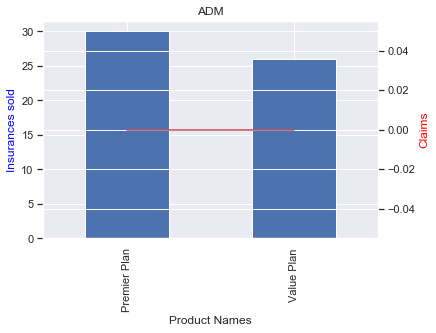

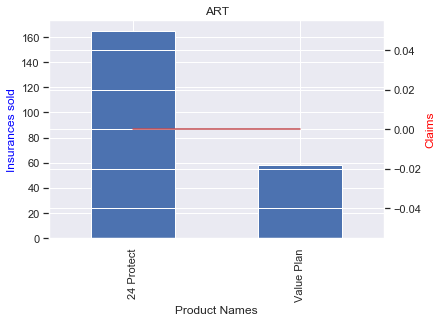

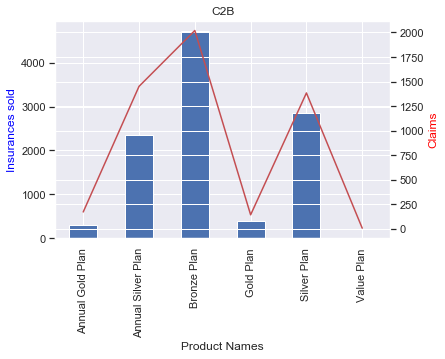

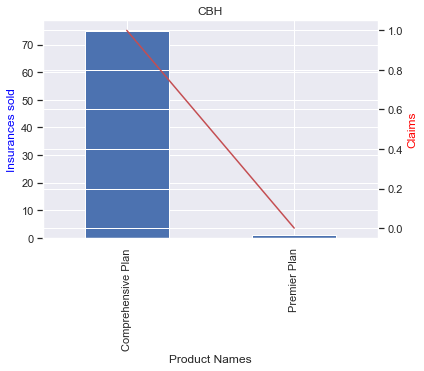

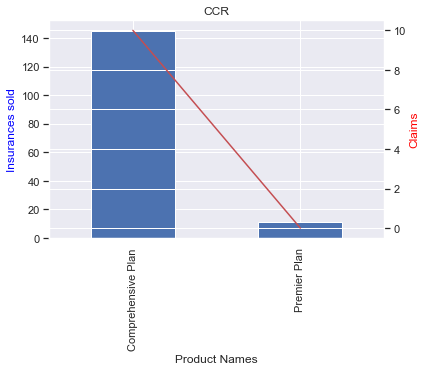

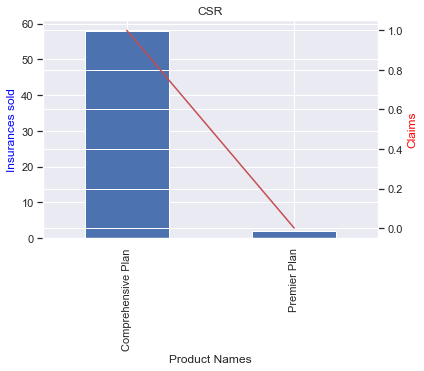

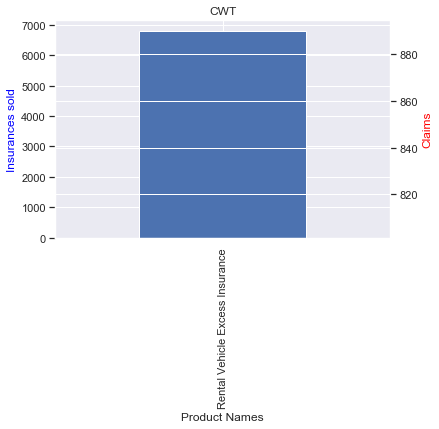

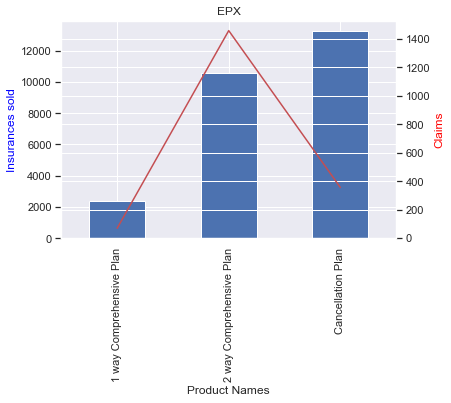

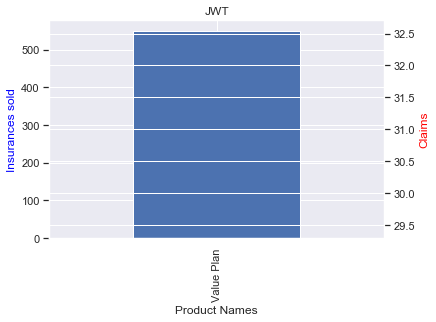

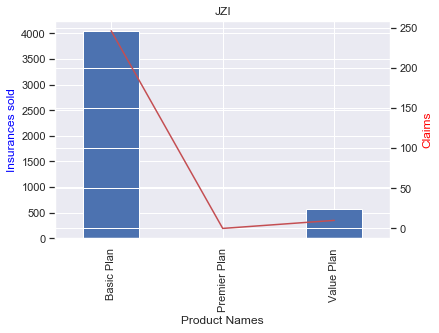

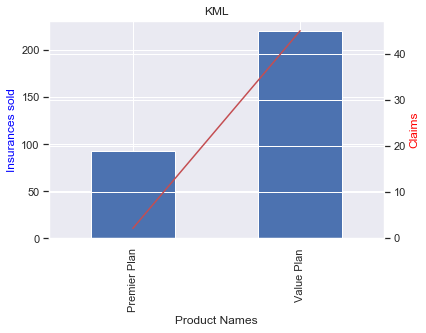

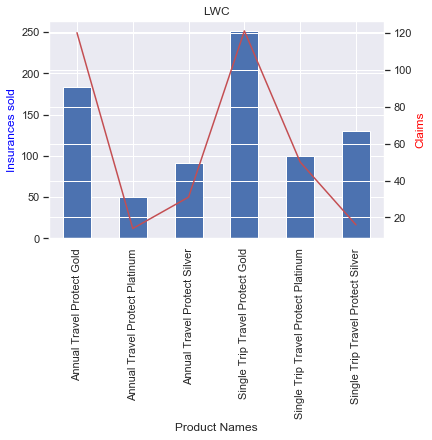

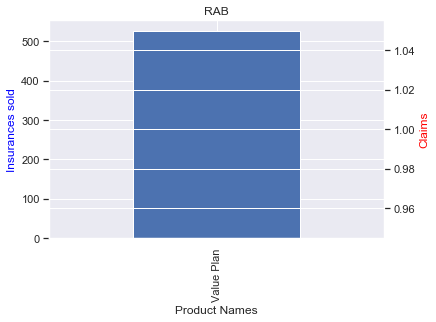

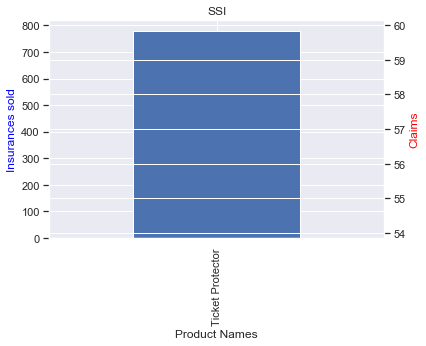

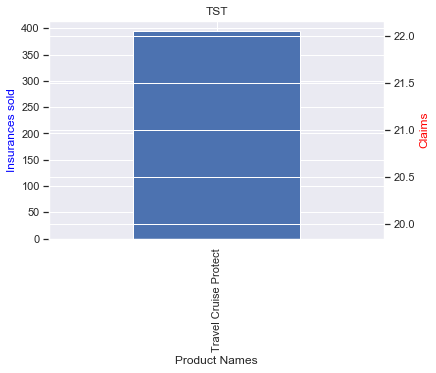

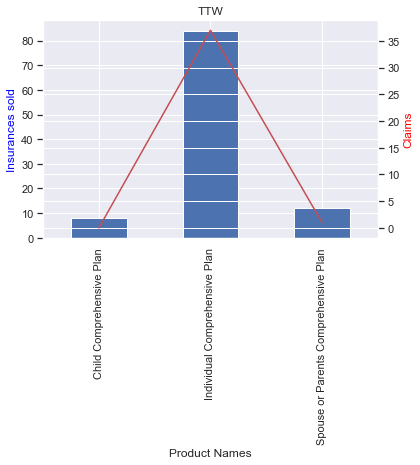

In [43]:
# Plotting Insurances sold and Claims by every Agency
Agencies=pivot.index.get_level_values(0).unique()
for Agency in Agencies:
    split=pivot.xs(Agency)
    Ins_sold=split["Insurances sold"]
    Claim=split["Claim"]
    
    fig = plt.figure()
    ax1 = Ins_sold.plot(kind="bar")
    ax2 = ax1.twinx()
    ax2.plot(ax1.get_xticks(),Claim,color="r")
    #ax2.set_ylim((-5, 50.))
    #ax1.set_ylim((0, 300.))
    ax1.set_ylabel('Insurances sold', color='blue')
    ax2.set_ylabel('Claims', color='red')
    ax1.set_xlabel('Product Names')
    plt.title(Agency)

### Analysis of Destination, Claim and Sales

In [44]:
# 1. Distribution of Destination of customers through a heat map of the world. 
pivot = train.pivot_table(index=['Destination'], values=['Insurances sold','Claim','Net Sales','Commision (in value)'], aggfunc='sum')
pivot.sort_values(by='Insurances sold', ascending=False, inplace=True)
pivot

,Claim,Commision (in value),Insurances sold,Net Sales
Destination,,,,
SINGAPORE,5306,258484.46,14242,1089683.77
THAILAND,458,25881.35,4562,116066.91
MALAYSIA,161,28986.26,4359,93820.07
CHINA,642,20443.16,3909,144085.76
AUSTRALIA,455,84078.97,3011,156237.55
...,...,...,...,...
BELARUS,0,55.63,2,52.50
BERMUDA,0,0.00,2,160.00
BHUTAN,0,56.39,2,86.75


<BarContainer object of 15 artists>

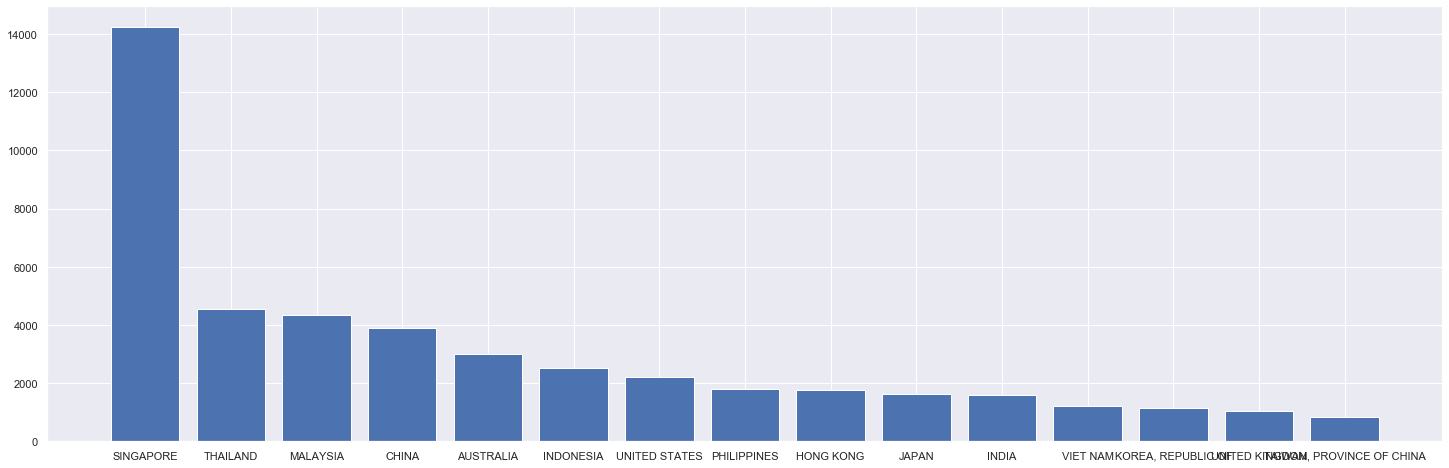

In [45]:
plott= pivot[:15]
plt.figure(figsize=(25,8))
plt.bar(plott.index, plott['Insurances sold'] )

<BarContainer object of 15 artists>

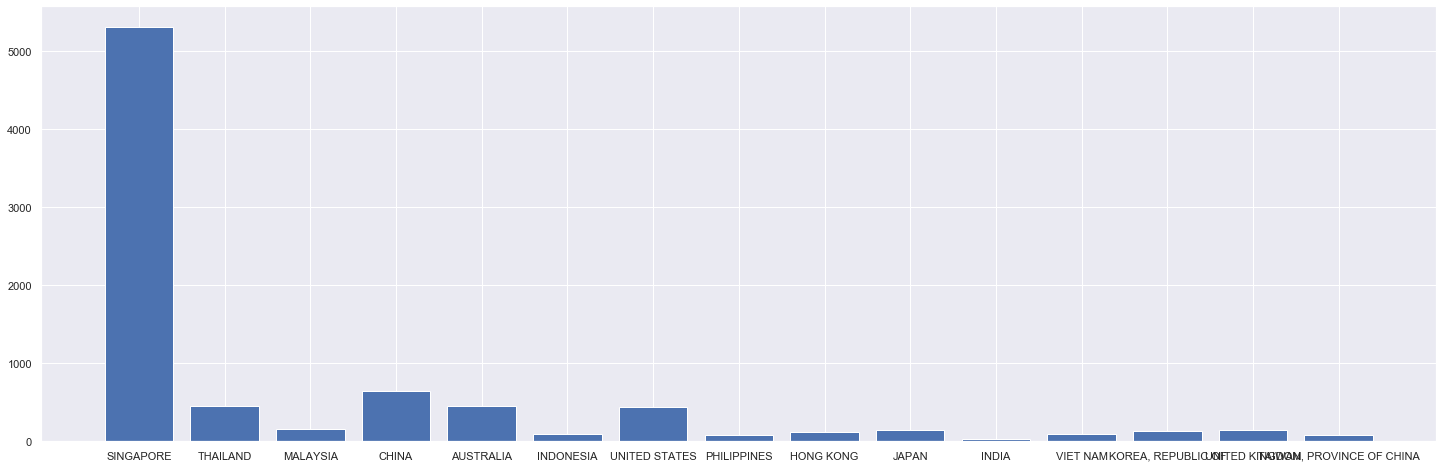

In [46]:
plott= pivot[:15]
plt.figure(figsize=(25,8))
plt.bar(plott.index, plott['Claim'] )

In [47]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold,Perc_Commission_seperate,Perc_Commission_included
count,52310.00,52310.00,52310.00,52310.00,52310.00,52310.00,52310.00,51921.00,51921.00
mean,6005.75,58.26,48.55,12.22,39.56,0.17,1.00,13.55,inf
std,2306.45,109.14,60.20,22.85,13.76,0.37,0.00,31.50,nan
min,2000.00,-2.00,-389.00,0.00,0.00,0.00,1.00,-5157.46,-364.55
25%,4015.00,10.00,19.80,0.00,33.00,0.00,1.00,0.00,0.00
50%,6002.00,24.00,29.50,0.00,36.00,0.00,1.00,0.00,0.00
75%,8004.00,57.00,55.00,13.38,43.00,0.00,1.00,25.93,35.00
max,10000.00,4881.00,682.00,262.76,118.00,1.00,1.00,137.80,inf


### Analysis of Age Column

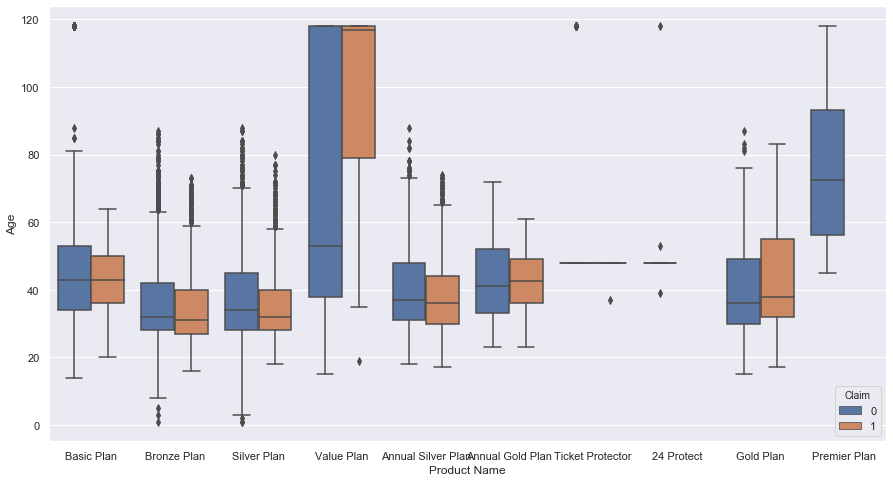

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Product Name", y="Age", hue="Claim", data=Airlines_only)

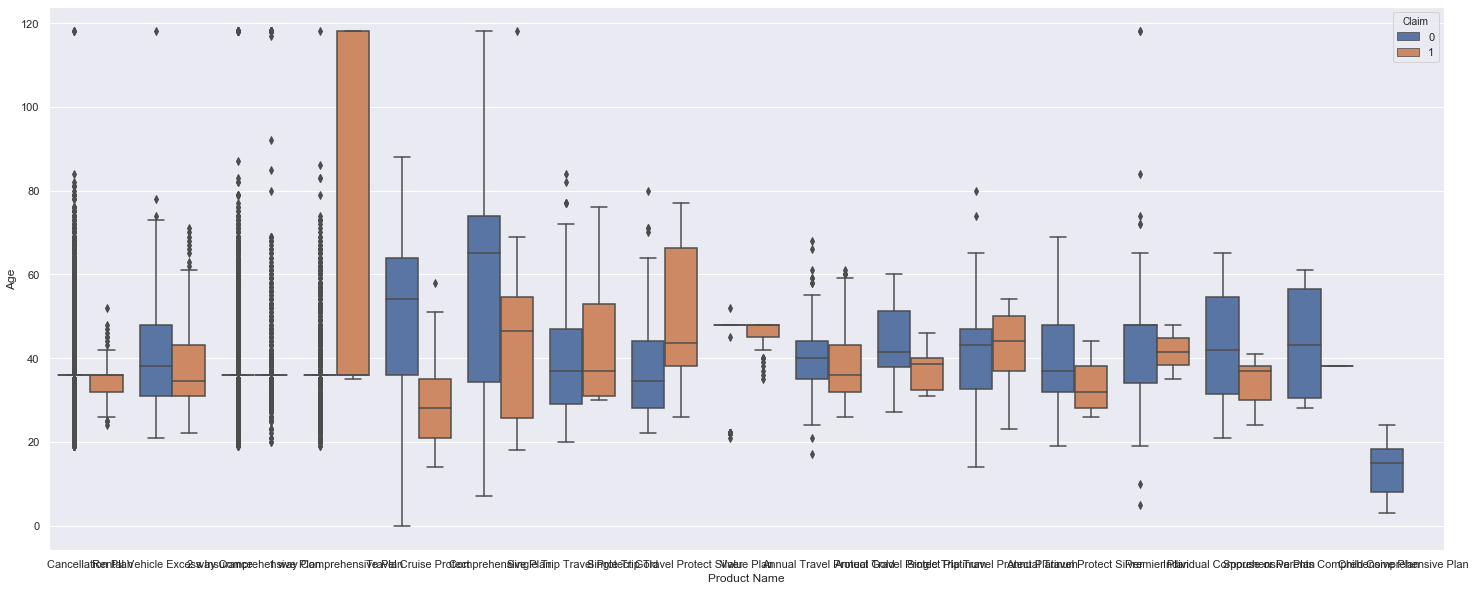

In [49]:
plt.figure(figsize=(25,10))
sns.boxplot(x="Product Name", y="Age", hue="Claim", data=Agency_only)

In [50]:
# 6. Duration-Claim
train['age_bins'] = pd.cut(x=train['Age'], bins=[-1,9,19,29,39,49,59,69,79,89,99,109,119])
train['age_bins'].isnull().sum()

0

In [51]:
# There will be null values in age_bin column if you don't want to consider 0 age. 
is_NaN = train.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = train[row_has_NaN]
rows_with_NaN

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Insurances sold,Perc_Commission_seperate,Perc_Commission_included,age_bins
83,5146,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,EGYPT,0.00,0.00,44,0,1,nan,nan,"(39, 49]"
121,8357,EPX,Travel Agency,Online,2 way Comprehensive Plan,47,JAPAN,0.00,0.00,36,0,1,nan,nan,"(29, 39]"
204,4279,EPX,Travel Agency,Online,Cancellation Plan,9,ISRAEL,0.00,0.00,36,0,1,nan,nan,"(29, 39]"
272,3901,EPX,Travel Agency,Online,2 way Comprehensive Plan,16,AUSTRALIA,0.00,0.00,36,0,1,nan,nan,"(29, 39]"
498,2095,EPX,Travel Agency,Online,Cancellation Plan,9,JAPAN,0.00,0.00,36,0,1,nan,nan,"(29, 39]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52031,9915,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,RUSSIAN FEDERATION,0.00,0.00,36,0,1,nan,nan,"(29, 39]"
52070,5379,EPX,Travel Agency,Online,1 way Comprehensive Plan,3,INDONESIA,0.00,0.00,35,0,1,nan,nan,"(29, 39]"
52094,6053,EPX,Travel Agency,Online,Cancellation Plan,25,MYANMAR,0.00,0.00,36,0,1,nan,nan,"(29, 39]"
52211,8049,EPX,Travel Agency,Online,1 way Comprehensive Plan,8,CHINA,0.00,0.00,63,0,1,nan,nan,"(59, 69]"


In [52]:
pivot = train.pivot_table(index=['age_bins'], values=['Insurances sold','Claim'], aggfunc='sum')
pivot

,Claim,Insurances sold
age_bins,,
"(-1, 9]",0,26
"(9, 19]",20,171
"(19, 29]",1916,7147
"(29, 39]",4274,29416
"(39, 49]",1361,7827
"(49, 59]",735,4483
"(59, 69]",251,1867
"(69, 79]",80,527
"(79, 89]",10,105


In [53]:
pivot.index = pivot.index.astype(str)
pivot.index

Index(['(-1, 9]', '(9, 19]', '(19, 29]', '(29, 39]', '(39, 49]', '(49, 59]',
       '(59, 69]', '(69, 79]', '(79, 89]', '(89, 99]', '(99, 109]',
       '(109, 119]'],
      dtype='object', name='age_bins')

<BarContainer object of 12 artists>

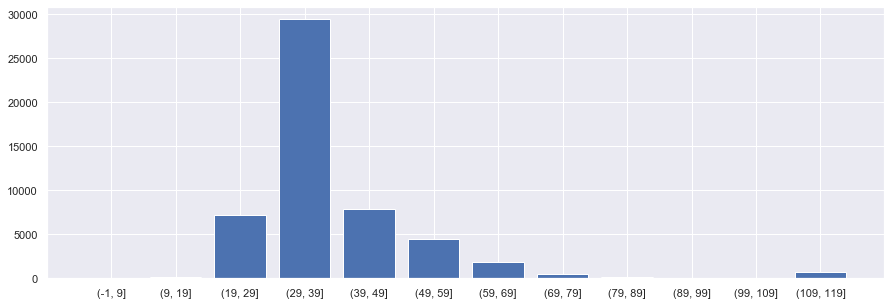

In [54]:
plt.figure(figsize=(15,5))
plt.bar(pivot.index, pivot['Insurances sold'] )

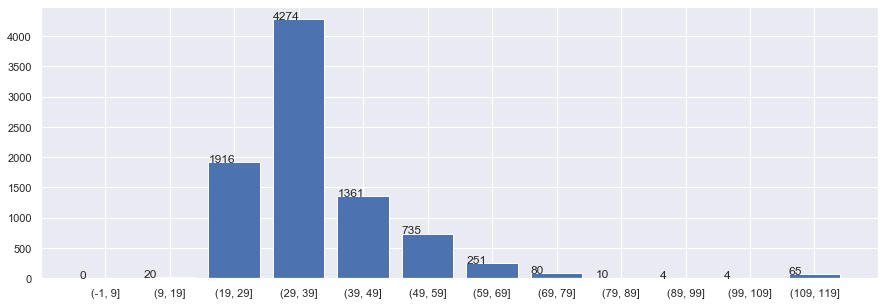

In [55]:
# assign your bars to a variable so their attributes can be accessed
plt.figure(figsize=(15,5))
bars = plt.bar(pivot.index, pivot['Claim'], width=0.8)
# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval +.5, yval)

### Analysis of Rows with Negative Net Sales

In [56]:
Negative_sales = train[train['Net Sales'] < 0]
Negative_sales

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Insurances sold,Perc_Commission_seperate,Perc_Commission_included,age_bins
104,9734,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81,UNITED KINGDOM,-128.70,77.22,63,0,1,-150.00,-60.00,"(59, 69]"
147,7747,EPX,Travel Agency,Online,Cancellation Plan,15,CANADA,-17.00,0.00,24,0,1,-0.00,-0.00,"(19, 29]"
190,8778,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,178,AUSTRALIA,-69.30,41.58,29,0,1,-150.00,-60.00,"(19, 29]"
485,9677,C2B,Airlines,Online,Annual Silver Plan,364,SINGAPORE,-389.00,97.25,27,0,1,-33.33,-25.00,"(19, 29]"
587,5675,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,31,JAPAN,-69.30,41.58,26,0,1,-150.00,-60.00,"(19, 29]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52023,9070,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,11,FRANCE,-29.70,17.82,26,0,1,-150.00,-60.00,"(19, 29]"
52119,4121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,193,ITALY,-277.20,166.32,65,0,1,-150.00,-60.00,"(59, 69]"
52154,9527,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,196,AUSTRALIA,-69.30,41.58,66,0,1,-150.00,-60.00,"(59, 69]"
52163,3711,EPX,Travel Agency,Online,Cancellation Plan,18,JAPAN,-45.00,0.00,54,0,1,-0.00,-0.00,"(49, 59]"


503 Rows with negative Net Sales amount. We can find analysis for these rows

In [57]:
# 3. Agency Type- Agency- Claim  & 7. Net Sales and commission of Agencies using Pivot
pivot = Negative_sales.pivot_table(index=['Agency Type','Agency'], values=['Insurances sold','Claim','Net Sales','Commision (in value)'], columns=[], aggfunc='sum').fillna('')
pivot

Claim  Commision (in value)  Insurances sold  Net Sales
Agency Type   Agency                                                         
Airlines      ART         0                 24.27                4     -69.36
              C2B         0               1097.83               35   -4391.15
              JWT         0                 99.20                5    -248.00
              JZI         6                384.69               26   -1058.71
              RAB         0                 12.00                2     -30.00
              SSI         0                  0.06                3      -0.21
Travel Agency ADM         0                327.56               10    -862.00
              CBH         0                 19.14                2     -58.00
              CWT         0               9533.70              259  -15889.50
              EPX        10                  0.00              148   -6442.29
              KML         0                127.30                3    -335.00
              LWC         0                 72.16                3    -111.00
              TST         0                 31.50                3     -90.00

In [58]:
pivot = Negative_sales.pivot_table(index=['Agency','Product Name'], values=['Insurances sold','Claim','Net Sales','Commision (in value)'], aggfunc='sum')
pivot

Claim  Commision (in value)  \
Agency Product Name                                                     
ADM    Premier Plan                           0                150.10   
       Value Plan                             0                177.46   
ART    24 Protect                             0                 24.27   
C2B    Annual Gold Plan                       0                 71.85   
       Annual Silver Plan                     0                644.74   
       Bronze Plan                            0                190.19   
       Gold Plan                              0                 89.38   
       Silver Plan                            0                101.67   
CBH    Comprehensive Plan                     0                 19.14   
CWT    Rental Vehicle Excess Insurance        0               9533.70   
EPX    1 way Comprehensive Plan               0                  0.00   
       2 way Comprehensive Plan               5                  0.00   
       Cancellation Plan                      5                  0.00   
JWT    Value Plan                             0                 99.20   
JZI    Basic Plan                             6                226.14   
       Value Plan                             0                158.55   
KML    Premier Plan                           0                 98.80   
       Value Plan                             0                 28.50   
LWC    Single Trip Travel Protect Gold        0                 54.93   
       Single Trip Travel Protect Silver      0                 17.23   
RAB    Value Plan                             0                 12.00   
SSI    Ticket Protector                       0                  0.06   
TST    Travel Cruise Protect                  0                 31.50   

                                          Insurances sold  Net Sales  
Agency Product Name                                                   
ADM    Premier Plan                                     5    -395.00  
       Value Plan                                       5    -467.00  
ART    24 Protect                                       4     -69.36  
C2B    Annual Gold Plan                                 1    -287.40  
       Annual Silver Plan                              10   -2578.95  
       Bronze Plan                                     13    -760.70  
       Gold Plan                                        1    -357.50  
       Silver Plan                                     10    -406.60  
CBH    Comprehensive Plan                               2     -58.00  
CWT    Rental Vehicle Excess Insurance                259  -15889.50  
EPX    1 way Comprehensive Plan                        10    -442.00  
       2 way Comprehensive Plan                        49   -2602.61  
       Cancellation Plan                               89   -3397.69  
JWT    Value Plan                                       5    -248.00  
JZI    Basic Plan                                      21    -605.71  
       Value Plan                                       5    -453.00  
KML    Premier Plan                                     2    -260.00  
       Value Plan                                       1     -75.00  
LWC    Single Trip Travel Protect Gold                  2     -84.50  
       Single Trip Travel Protect Silver                1     -26.50  
RAB    Value Plan                                       2     -30.00  
SSI    Ticket Protector                                 3      -0.21  
TST    Travel Cruise Protect                            3     -90.00

### Analysis on Duration Column

In [59]:
data3= train[train['Duration'] ==1]
print(data3.shape)
data3

(577, 15)


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Insurances sold,Perc_Commission_seperate,Perc_Commission_included,age_bins
69,7521,C2B,Airlines,Online,Bronze Plan,1,SINGAPORE,13.80,3.45,30,0,1,20.00,25.00,"(29, 39]"
323,2808,EPX,Travel Agency,Online,Cancellation Plan,1,MALAYSIA,15.00,0.00,32,0,1,0.00,0.00,"(29, 39]"
384,9241,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,THAILAND,21.00,0.00,25,0,1,0.00,0.00,"(19, 29]"
402,4410,EPX,Travel Agency,Online,2 way Comprehensive Plan,1,MYANMAR,20.00,0.00,36,0,1,0.00,0.00,"(29, 39]"
406,7772,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,SINGAPORE,20.00,0.00,36,0,1,0.00,0.00,"(29, 39]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52035,6471,EPX,Travel Agency,Online,Cancellation Plan,1,THAILAND,10.00,0.00,58,0,1,0.00,0.00,"(49, 59]"
52059,6143,EPX,Travel Agency,Online,Cancellation Plan,1,CAMBODIA,10.00,0.00,35,0,1,0.00,0.00,"(29, 39]"
52086,4897,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,MALAYSIA,20.00,0.00,36,0,1,0.00,0.00,"(29, 39]"
52263,3260,C2B,Airlines,Online,Bronze Plan,1,SINGAPORE,13.50,3.38,50,0,1,20.02,25.04,"(49, 59]"


Do some analysis on Duration Column. There are 46 rows with 0 Duration value and all not claim.
So find some insights for this column
4 Rows with negative duration value and also age is 118. Rows can be considered unnecessary and removed

[(0, 500)]

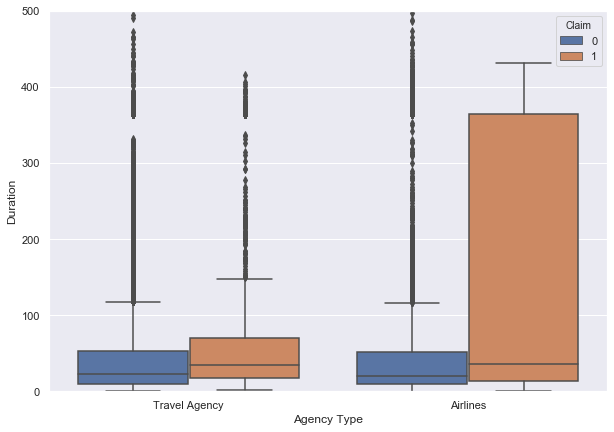

In [60]:
plt.figure(figsize=(10,7))
ax= sns.boxplot(x="Agency Type", y="Duration", hue="Claim", data=train)
ax.set(ylim=(0, 500))

[(0, 500)]

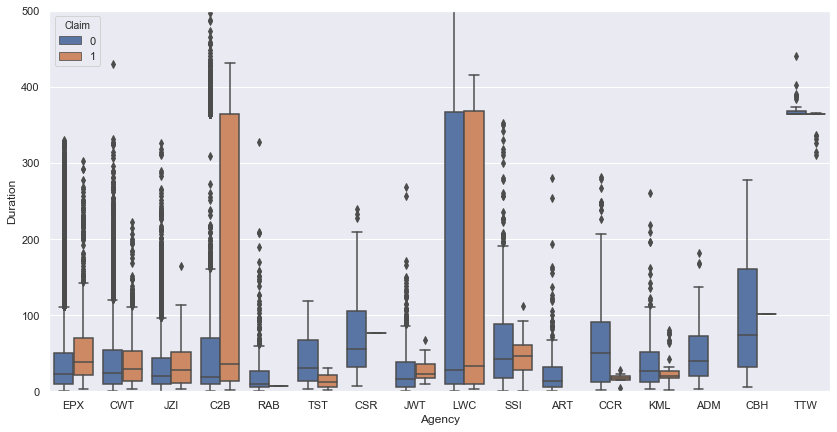

In [61]:
plt.figure(figsize=(14,7))
ax= sns.boxplot(x="Agency", y="Duration", hue="Claim", data=train)
ax.set(ylim=(0, 500))

[(0, 500)]

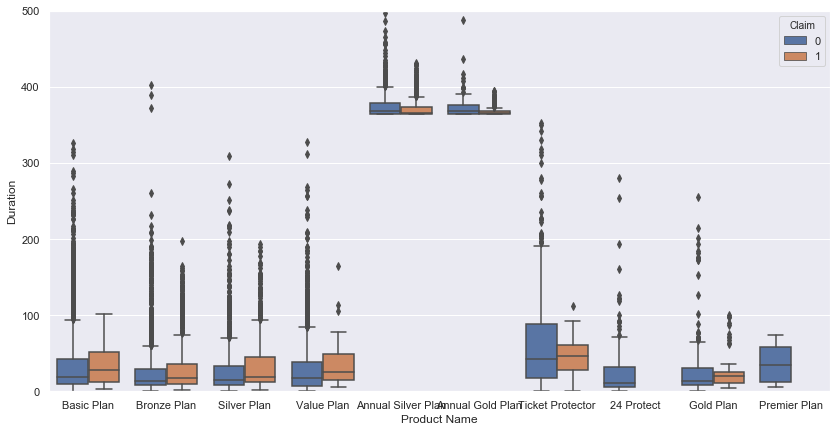

In [62]:
plt.figure(figsize=(14,7))
ax= sns.boxplot(x="Product Name", y="Duration", hue="Claim", data=Airlines_only)
ax.set(ylim=(0, 500))

[(0, 500)]

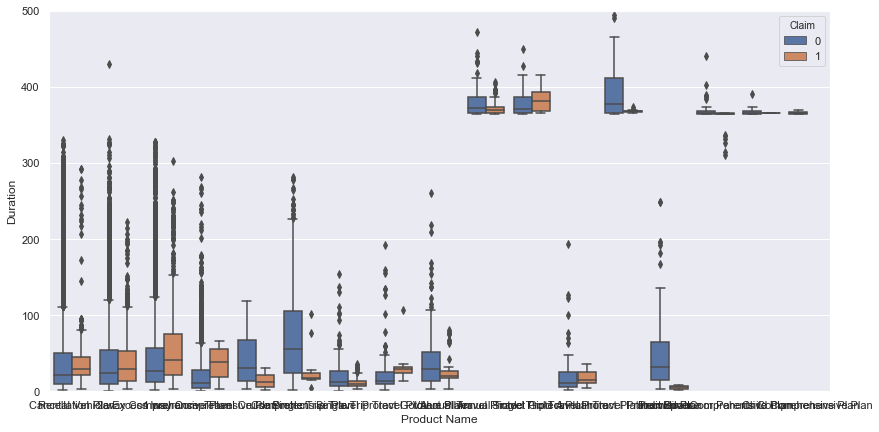

In [63]:
plt.figure(figsize=(14,7))
ax= sns.boxplot(x="Product Name", y="Duration", hue="Claim", data=Agency_only)
ax.set(ylim=(0, 500))

In [64]:
# 6. Duration-Claim
train['Duration_bins'] = pd.cut(x=train['Duration'], bins=[-3,0,19,39,59,79,99,199,299,399,499,999,1999,2999,3999,4999])
train['Duration_bins'].isnull().sum()

0

In [65]:
pivot = train.pivot_table(index=['Duration_bins'], values=['Insurances sold','Claim'], aggfunc='sum')
pivot

,Claim,Insurances sold
Duration_bins,,
"(-3, 0]",0,46
"(0, 19]",2935,22965
"(19, 39]",1764,11013
"(39, 59]",875,5613
"(59, 79]",541,3364
"(79, 99]",265,2131
"(99, 199]",418,3323
"(199, 299]",95,705
"(299, 399]",1789,2972


[(0, 500)]

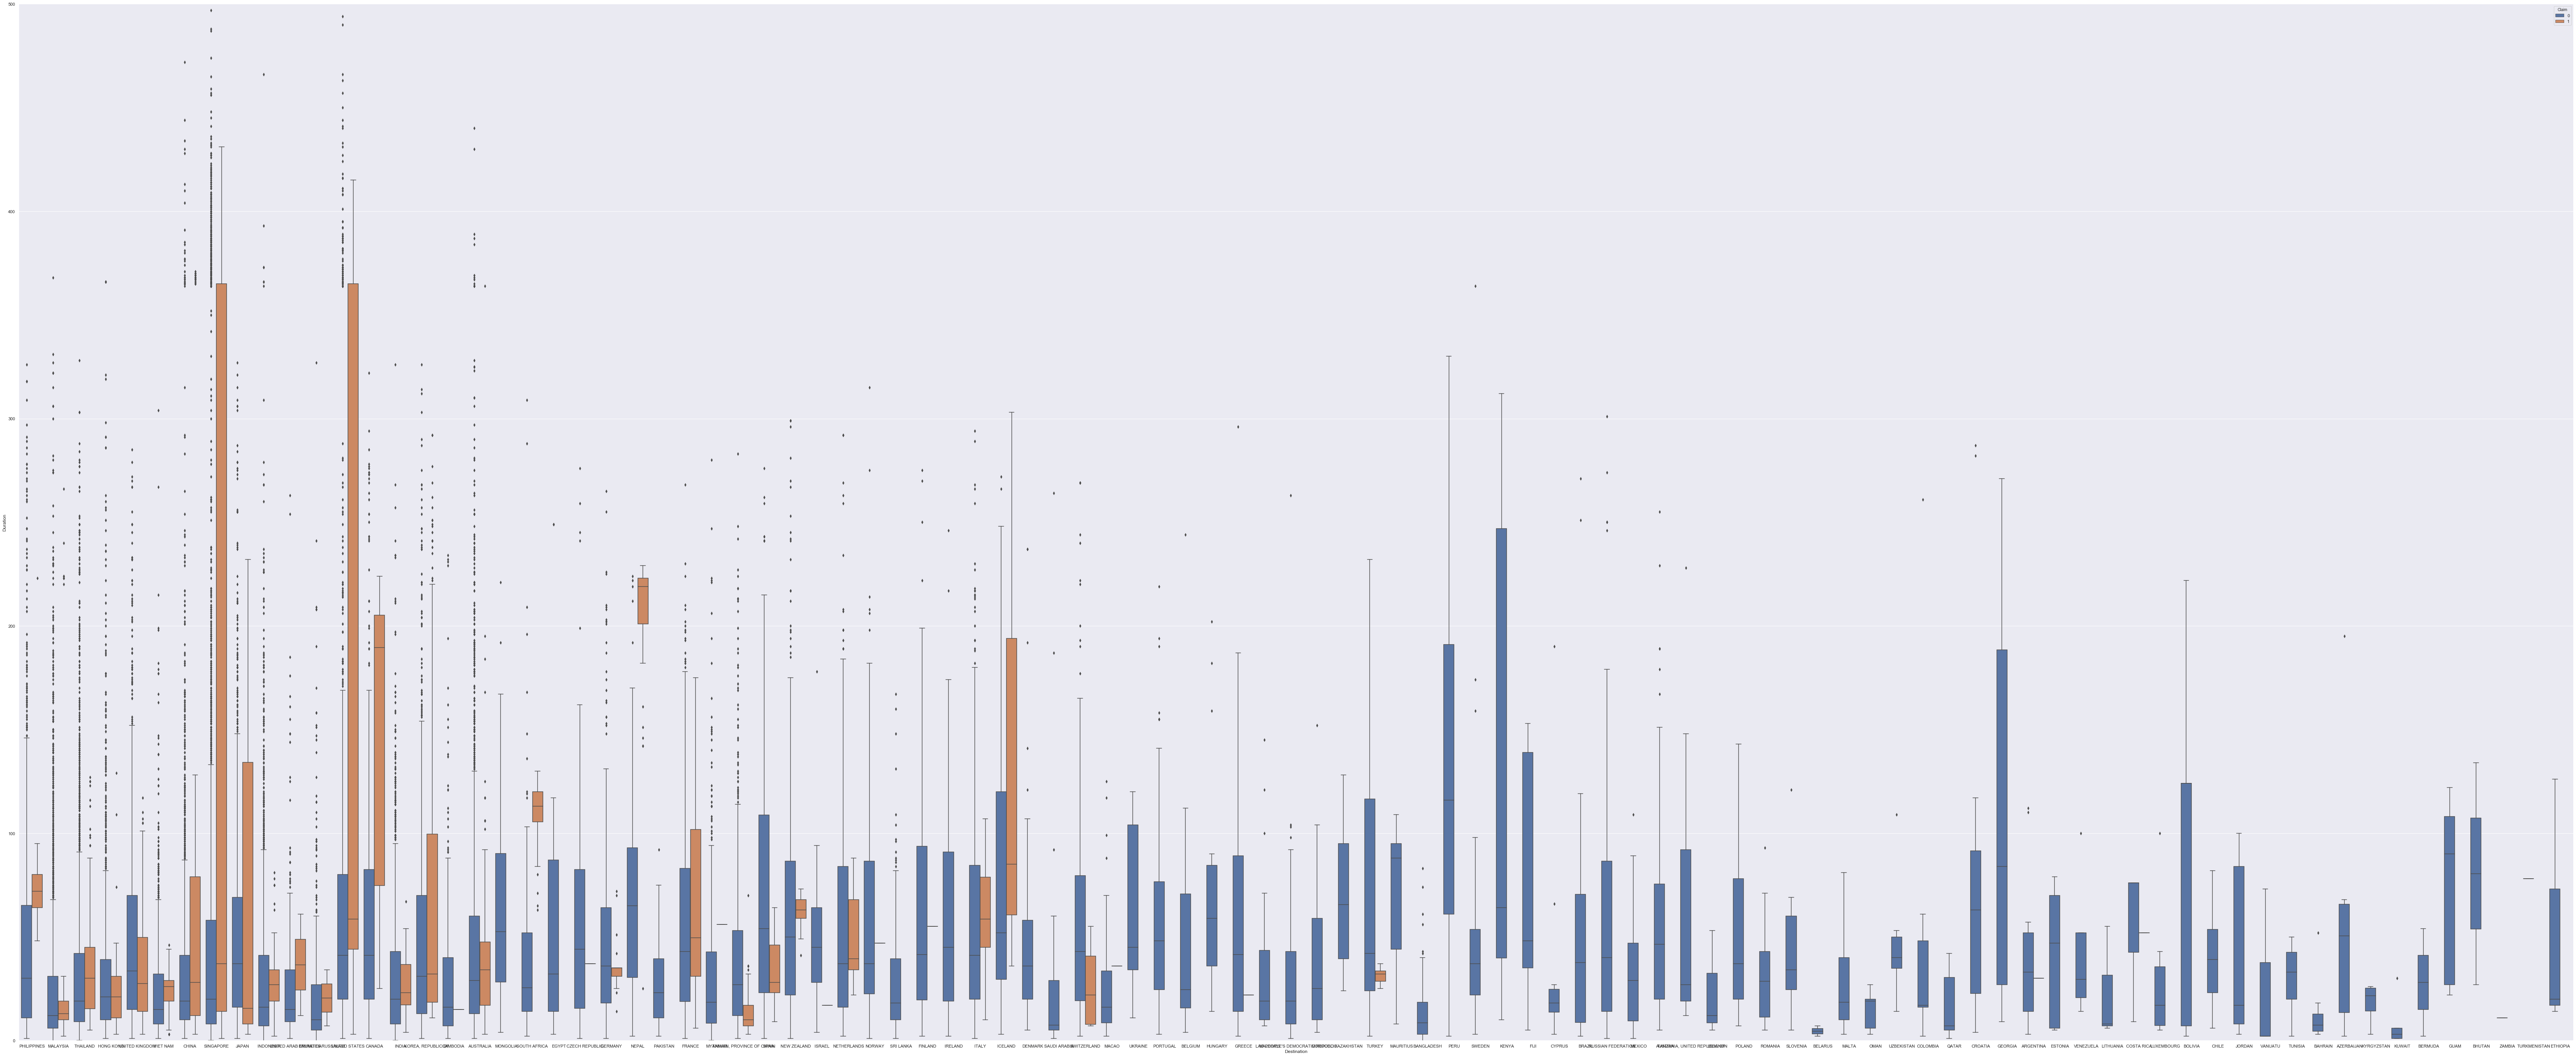

In [66]:
# Destinations where people have travelled for longer duration
plt.figure(figsize=(120,50))
ax= sns.boxplot(x="Destination", y="Duration", hue="Claim", data=train)
ax.set(ylim=(0, 500))

In [67]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim,Insurances sold,Perc_Commission_seperate,Perc_Commission_included
count,52310.00,52310.00,52310.00,52310.00,52310.00,52310.00,52310.00,51921.00,51921.00
mean,6005.75,58.26,48.55,12.22,39.56,0.17,1.00,13.55,inf
std,2306.45,109.14,60.20,22.85,13.76,0.37,0.00,31.50,nan
min,2000.00,-2.00,-389.00,0.00,0.00,0.00,1.00,-5157.46,-364.55
25%,4015.00,10.00,19.80,0.00,33.00,0.00,1.00,0.00,0.00
50%,6002.00,24.00,29.50,0.00,36.00,0.00,1.00,0.00,0.00
75%,8004.00,57.00,55.00,13.38,43.00,0.00,1.00,25.93,35.00
max,10000.00,4881.00,682.00,262.76,118.00,1.00,1.00,137.80,inf


### Encoding Categorical Columns to Numerical columns on Train and Test

In [149]:
# Drop Columns
train1= train.drop(['Insurances sold','age_bins','Perc_Commission_seperate','Perc_Commission_included', 'Duration_bins'],1)
train1.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.00,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.00,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.80,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.00,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.00,0.00,36,0


In [150]:
X = train1.drop('Claim',1)
y = train1['Claim']

In [151]:
# Categorical Columns in the data set
cat_cols = X.select_dtypes(include='object').columns.tolist()
cat_cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

In [152]:
# Numerical Columns in the data set
numcols= X.select_dtypes(include=['number']).columns.tolist()
print(numcols)

['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age']


In [153]:
# Two Options: Drop ID column and run model or run it with the ID column
X.drop('ID', 1, inplace=True)

In [154]:
test = pd.read_csv('test.csv')
Id = test['ID'].copy()
test.drop(['ID'], 1, inplace = True)

In [155]:
X.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              25
Duration                 439
Destination               97
Net Sales               6700
Commision (in value)    5101
Age                       99
dtype: int64

##### Different Options with Encoding Categorical Columns- 
1. Label Encoding all 5 Columns- Agency, Agency Type, Distribution Channel, Product Name, Destination
2. One Hot Encoding 2 Columns- Agency, Distribution Channel. Rest Label Encoding.
3. One Hot Encoding 4 Columns-  Agency, Agency Type, Distribution Channel, Product Name & Label Encoding Destination
4. One Hot Encoding all 5 columns
5. Binary Encoder on all categorical columns

In [156]:
import category_encoders as ce

In [157]:
# Binary Encoder on Categorical Columns
for col in cat_cols:
    encoder  =  ce.BinaryEncoder(cols=[col])
    X =  encoder.fit_transform(X)
    test =  encoder.transform(test)

In [ ]:
# Label Encoding on columns- Agency Type and Distribution Channel
X['Agency_Type_num'] = X['Agency Type'].map({'Travel Agency': 1, 'Airlines': 0})
X['Distribution_Channel_num'] = X['Distribution Channel'].map({'Online': 1, 'Offline': 0})

In [114]:
# Label Encoding on columns- Agency Type and Distribution Channel
test['Agency_Type_num'] = test['Agency Type'].map({'Travel Agency': 1, 'Airlines': 0})
test['Distribution_Channel_num'] = test['Distribution Channel'].map({'Online': 1, 'Offline': 0})

In [71]:
# One Hot Encoding using get_dummies
X= pd.concat([pd.get_dummies(X['Agency Type']),X], axis=1)
X= pd.concat([pd.get_dummies(X['Distribution Channel']),X], axis=1)

In [115]:
# One Hot Encoding using get_dummies
test= pd.concat([pd.get_dummies(test['Agency Type']),test], axis=1)
test= pd.concat([pd.get_dummies(test['Distribution Channel']),test], axis=1)

In [144]:
# One Hot Encoding using get_dummies on Agency and Product Name
X= pd.concat([pd.get_dummies(X['Agency']),X], axis=1)
X= pd.concat([pd.get_dummies(X['Product Name']),X], axis=1)

In [130]:
X= pd.concat([pd.get_dummies(X['Destination']),X], axis=1)

In [120]:
# One Hot Encoding using get_dummies on Agency and Product Name
test= pd.concat([pd.get_dummies(test['Agency']),test], axis=1)
test= pd.concat([pd.get_dummies(test['Product Name']),test], axis=1)

In [121]:
test= pd.concat([pd.get_dummies(test['Destination']),test], axis=1)

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [148]:
# Assigning numerical values and storing in another column
X['Agency_num'] = labelencoder.fit_transform(X['Agency'])
test['Agency_num'] = labelencoder.transform(test['Agency'])
X['Product_Name_num'] = labelencoder.fit_transform(X['Product Name'])
test['Product_Name_num'] = labelencoder.transform(test['Product Name'])

In [149]:
# Label Encoding on Destination
X['Destination_num'] = labelencoder.fit_transform(X['Destination'])
test['Destination_num'] = labelencoder.transform(test['Destination'])

In [150]:
X.drop(['Agency','Product Name','Destination','Agency Type','Distribution Channel'],1,inplace=True)
X.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_Type_num,Distribution_Channel_num,Agency_num,Product_Name_num,Destination_num
0,61,12.00,0.00,41,0,1,1,7,10,68
1,4,17.00,0.00,35,0,1,1,7,10,53
2,26,19.80,11.88,47,0,1,1,6,16,84
3,15,27.00,0.00,48,0,1,1,7,1,33
4,15,37.00,0.00,36,0,1,1,7,1,53


In [122]:
test.drop(['Agency','Product Name','Destination','Agency Type','Distribution Channel'],1,inplace=True)
test.head()

,ARGENTINA,AUSTRALIA,AUSTRIA,AZERBAIJAN,BAHRAIN,BANGLADESH,BELARUS,BELGIUM,BERMUDA,BHUTAN,...,Travel Agency,Duration,Net Sales,Commision (in value),Age,Agency_Type_num,Distribution_Channel_num,Agency_num,Product_Name_num,Destination_num
0,0,0,0,0,0,0,0,0,0,0,...,1,192,18.00,0.00,36,1,1,7,10,33
1,0,0,0,0,0,0,0,0,0,0,...,1,2,20.00,0.00,36,1,1,7,0,75
2,0,0,0,0,0,0,0,0,0,0,...,0,13,13.50,3.38,24,0,1,2,9,75
3,0,0,0,0,0,0,0,0,0,0,...,1,133,41.00,0.00,36,1,1,7,1,82
4,0,0,0,0,0,0,0,0,0,0,...,0,2,30.00,7.50,32,0,1,2,17,75


### Model Building- Logistic Regression

In [158]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

#Under Sampling
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
#Tomek Undersampling
from imblearn.under_sampling import TomekLinks
# SMOTE Over-sampling
from imblearn.over_sampling import SMOTE


In [80]:
# Code starts here

for n in [1]:

    random_state = 0

    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=0.15)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #poly = PolynomialFeatures(2)
    #X_train = poly.fit_transform(X_train)
    #X_test = poly.transform(X_test)

    clf = LogisticRegression(random_state=0)

    #anova = SelectKBest(score_func = f_regression,  k = n)
    #X_train = anova.fit_transform(X_train,y_train)
    #X_test = anova.transform(X_test)

    
    #rfe = RFE(clf,n)
    #X_train = rfe.fit_transform(X_train,y_train)
    #X_test = rfe.transform(X_test)
    
    #Tomeklink object creation
    #tl= TomekLinks(random_state=0)
    #Fitting and transforming data points
    #X_sample1, y_sample1 = tl.fit_sample(X_train, y_train)
    #clf.fit(X_sample1,y_sample1)
    
    #Cluster Centroids object- Undersampling
    #cc = under_sampling(random_state=0)
    #Fitting and transforming data points
    #X_sample2, y_sample2 = cc.fit_sample(X_train, y_train)
    #clf.fit(X_sample2,y_sample2)
    
    smote= SMOTE(random_state=0)
    X_sample3, y_sample3 = smote.fit_sample(X_train, y_train)
    clf.fit(X_sample3,y_sample3)

    #clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print("------------------------")

0.7915795155522569
0.7931693640881866
------------------------


In [81]:
accuracy= clf.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.7931693640881866
Recall score is 0.7012578616352201
Precision is 0.41779859484777515
f1 score is 0.5236278250660406
Confusion Matrix 
 [[5332 1243]
 [ 380  892]]
TP= 5332
FP= 1243
FN= 380
TN= 892


### Model building- Decision Tree Classifier

In [82]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [86]:
# Code starts here

for n in [38]:

    random_state = 1

    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=0.15)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    poly = PolynomialFeatures(2)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)

    #Initialize the Decision Tree Model
    clf= tree.DecisionTreeClassifier(criterion='gini', max_depth=n)

    #Tomeklink object creation
    #tl= TomekLinks(random_state=0)
    #Fitting and transforming data points
    #X_sample1, y_sample1 = tl.fit_sample(X_train, y_train)
    #clf.fit(X_sample1,y_sample1)
    
    #Cluster Centroids object- Undersampling
    #cc = under_sampling(random_state=0)
    #Fitting and transforming data points
    #X_sample2, y_sample2 = cc.fit_sample(X_train, y_train)
    #clf.fit(X_sample2,y_sample2)
    
    smote= SMOTE(random_state=0)
    X_sample3, y_sample3 = smote.fit_sample(X_train, y_train)
    clf.fit(X_sample3,y_sample3)

    #clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print("------------------------")

0.9897217911521939
0.9236650949407417
------------------------


In [87]:
accuracy= clf.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.9236650949407417
Recall score is 0.8362797847809378
Precision is 0.7381275440976933
f1 score is 0.7841441441441441
Confusion Matrix 
 [[6160  386]
 [ 213 1088]]
TP= 6160
FP= 386
FN= 213
TN= 1088


### Model building- Ensemble Techniques

#### 1. Naive Aggregation

In [88]:
from sklearn.ensemble import VotingClassifier

In [91]:
#Different models initialised
log_clf_1 = LogisticRegression(random_state=0)
log_clf_2 = LogisticRegression(random_state=42)
decision_clf1 = DecisionTreeClassifier(criterion = 'entropy',random_state=0, max_depth=32)
decision_clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=31)
rlc_clf1= RandomForestClassifier(min_samples_split = 2,random_state = 0, criterion = 'entropy')
rlc_clf2= RandomForestClassifier(min_samples_split = 3,random_state = 0, criterion = 'entropy')
#Creation of list of models
Model_List=[('Random Forest 1', rlc_clf1),
            ('Random Forest 2', rlc_clf2),
            ('Decision Tree 1', decision_clf1),
            ('Decision Tree 2', decision_clf2)]


#Splitting into train and test dataset
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.15, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

#Initialising hard voting model
voting_clf_hard= VotingClassifier(estimators= Model_List, voting='hard')
#Fitting the data
voting_clf_hard.fit(X_train,y_train)
#Scoring the model for test
print("Hard Voting Train Accuracy:%.2f" %voting_clf_hard.score(X_train,y_train))
hard_voting_score= voting_clf_hard.score(X_test,y_test)
print("Hard Voting Test Accuracy:%.2f"%hard_voting_score)

Hard Voting Train Accuracy:0.99
Hard Voting Test Accuracy:0.94


In [92]:
accuracy= voting_clf_hard.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.9361539441824901
Recall score is 0.20047169811320756
Precision is 0.17299864314789687
f1 score is 0.18572469045884923
Confusion Matrix 
 [[5356 1219]
 [1017  255]]
TP= 5356
FP= 1219
FN= 1017
TN= 255


In [93]:
#Initialising sofr voting model
voting_clf_soft= VotingClassifier(estimators= Model_List, voting='soft')
#Fitting the data
voting_clf_soft.fit(X_train,y_train)
#Scoring the model for test
print("Soft Voting Train Accuracy:%.2f" %voting_clf_soft.score(X_train,y_train))
soft_voting_score= voting_clf_soft.score(X_test,y_test)
print("Soft Voting Test Accuracy:%.2f"%soft_voting_score)

Soft Voting Train Accuracy:0.99
Soft Voting Test Accuracy:0.92


In [94]:
accuracy= voting_clf_soft.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.9220084108576526
Recall score is 0.20047169811320756
Precision is 0.17299864314789687
f1 score is 0.18572469045884923
Confusion Matrix 
 [[5356 1219]
 [1017  255]]
TP= 5356
FP= 1219
FN= 1017
TN= 255


#### 2. Bootstrap Aggregation, Pasting & Random Forest Classifier

In [159]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [104]:
# Code Starts here


for n in [2]:
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.15)
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    #poly = PolynomialFeatures(2)
    #X_train = poly.fit_transform(X_train)
    #X_test = poly.transform(X_test)
    
    #Initialising Random Forest Classifier with appropriate parameters
    #clf = RandomForestClassifier(min_samples_split = n,random_state = 0, criterion = 'entropy')
    clf = RandomForestClassifier(random_state=2,n_estimators=350,max_depth=35,max_features=10,min_samples_split=5)
    
    #anova = SelectKBest(score_func = f_regression,  k = n)
    #X_train = anova.fit_transform(X_train,y_train)
    #X_test = anova.transform(X_test)
    
    #Parameter grid
    #parameter_grid = {"max_depth": [2,3,None], "max_features": [1,3,10,11], "min_samples_leaf": [10,20,50], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}
    
    # Randomized search
    #clf_rlf= RandomForestClassifier(random_state=0)
    #clf= RandomizedSearchCV(estimator=clf_rlf,param_distributions=parameter_grid,n_iter=20,random_state=0)
    #clf.fit(X_train,y_train)
    
    # Grid Search
    #clf_rlf= RandomForestClassifier(random_state=0)
    #clf= GridSearchCV(estimator=clf_rlf, param_grid=parameter_grid)
    #clf.fit(X_train,y_train)
    
    #Initialising bagging with appropriate parameters
    #clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, random_state=0)
    
    #Initialising pasting with appropriate parameters
    #clf= BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=100,bootstrap=False,random_state=0)
    
    #smote= SMOTE(random_state=0)
    #X_sample3, y_sample3 = smote.fit_sample(X_train, y_train)
    #clf.fit(X_sample3,y_sample3)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print("----------------------")


0.9869104648809122
0.9440550528864534
----------------------


In [105]:
accuracy= clf.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.9440550528864534
Recall score is 0.7916666666666666
Precision is 0.8699918233851186
f1 score is 0.8289832489287106
Confusion Matrix 
 [[6344  159]
 [ 280 1064]]
TP= 6344
FP= 159
FN= 280
TN= 1064


#### Model building- ADA Boost & XGBoost

In [160]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [161]:
# Code Starts here

#Splitting features and target class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [108]:
#Fitting of Weak Classifier

dt_clf=RandomForestClassifier(min_samples_split = 3,random_state = 0, criterion = 'entropy')
dt_clf.fit(X_train,y_train)
dt_score=dt_clf.score(X_test,y_test)
print("Score of Weak classifier:",dt_score)

Score of Weak classifier: 0.9411239964317574


In [109]:
# Fitting of weak classifier with Adaboost
ada_clf = AdaBoostClassifier(base_estimator=dt_clf,random_state=0)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
ada_score_train=ada_clf.score(X_train,y_train)
ada_score_test=ada_clf.score(X_test,y_test)
print("\nScore of AdaBoost on Train:",ada_score_train)
print("\nScore of AdaBoost on Test:",ada_score_test)


Score of AdaBoost on Train: 0.9946247441693093

Score of AdaBoost on Test: 0.9416337453804001


In [110]:
accuracy= ada_clf.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.9416337453804001
Recall score is 0.8117559523809523
Precision is 0.841820987654321
f1 score is 0.8265151515151515
Confusion Matrix 
 [[6298  205]
 [ 253 1091]]
TP= 6298
FP= 205
FN= 253
TN= 1091


In [162]:
# Fitting of weak classifier with XGBoost
xgb_clf = XGBClassifier(random_state=2, learning_rate =0.01, n_estimators=1800, max_depth=35, min_child_weight=4, gamma=0,
 subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005, objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
xgb_score_train= xgb_clf.score(X_train,y_train)
xgb_score_test= xgb_clf.score(X_test,y_test)
print("\nScore of XGBoost on Train:",xgb_score_train)
print("\nScore of XGBoost on Test:",xgb_score_test)


Score of XGBoost on Train: 0.9832220048129906

Score of XGBoost on Test: 0.9520835988275774


In [163]:
accuracy= xgb_clf.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.9520835988275774
Recall score is 0.8348214285714286
Precision is 0.8793103448275862
f1 score is 0.8564885496183207
Confusion Matrix 
 [[6349  154]
 [ 222 1122]]
TP= 6349
FP= 154
FN= 222
TN= 1122


### Model Run on Test Data

In [164]:
#### Run Model
#test = scaler.transform(test)
#test = poly.transform(test)
pred= xgb_clf.predict(test)

In [165]:
submission = pd.DataFrame({'ID': Id, 'Claim': pred})
submission

,ID,Claim
0,17631,0
1,15064,0
2,14139,0
3,19754,0
4,16439,0
...,...,...
22416,13227,0
22417,12767,0
22418,13638,0
22419,14859,0


In [166]:
submission['Claim'].value_counts()

0    18908
1     3513
Name: Claim, dtype: int64

In [167]:
submission.to_csv('Final_Submission_XGBoost.csv', index = False)